<p align="center">
  <img src="https://teias.institute/wp-content/uploads/2021/07/TEIAS-LOGO-DARK.png" alt="TEIAS Institute Logo" width="400"/>
</p>

# **Statistical Inference**
### **Project-Phase 2**
----
### **Zeinab Hosseini**

June 2024
--------



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Impot libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import MultiComparison

# **About dataset**

In the first part of our project, we cleaned up the initial dataset to make sure it was ready for analysis. Now, for Phase 2, we'll continue using this cleaned dataset from Phase 1. This helps us keep everything consistent and avoids wasting time redoing the cleaning steps.

The dataset we cleaned in Phase 1 contains 102,058 records and has 17 different features.

During the data cleaning phase, we took several important steps to ensure the dataset was accurate and suitable for analysis.

Firstly, we removed columns that didn't provide meaningful information or help with our analysis. This helped us focus on the most relevant features.

We also identified and removed any duplicate rows to avoid having redundant data that could skew our results.

To deal with missing data, we followed a systematic approach. For numerical features, we filled in missing values with either the median or mean, depending on the distribution of each feature and whether there were outliers. For categorical features, we used the mode (the most common value) to fill in missing entries, ensuring our data remained consistent.

We also used validation techniques to check the data thoroughly and detect any outliers. Any extreme values that didn't fit the expected range were carefully reviewed and adjusted as needed, based on our knowledge of the subject matter and the nature of the data.

By following these rigorous data cleaning procedures, we ensured that our dataset was well-prepared for the next stages of the project. This helps us conduct more reliable and valid analyses moving forward.

In [2]:
df = pd.read_csv('./df.csv')

In [3]:
df.head()

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,0.38,4.0,2.0,228.0
2,unconfirmed,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,0.74,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,0.10,3.0,1.0,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102058 non-null  object 
 1   neighbourhood group             102058 non-null  object 
 2   neighbourhood                   102058 non-null  object 
 3   lat                             102058 non-null  float64
 4   long                            102058 non-null  float64
 5   instant_bookable                102058 non-null  bool   
 6   cancellation_policy             102058 non-null  object 
 7   room type                       102058 non-null  object 
 8   Construction year               102058 non-null  float64
 9   price                           102058 non-null  object 
 10  service fee                     102058 non-null  object 
 11  minimum nights                  102058 non-null  float64
 12  number of review

In [5]:
df.describe()

,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000
mean,40.728097,-73.949653,2012.487066,8.106547,27.481158,1.276926,3.277862,7.915254,140.433067
std,0.055850,0.049500,5.759833,30.558319,49.534887,1.623225,1.283174,32.218215,132.889408
min,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,40.688730,-73.982580,2008.000000,2.000000,1.000000,0.280000,2.000000,1.000000,4.000000
50%,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,98.000000
75%,40.762760,-73.932350,2017.000000,5.000000,30.000000,1.710000,4.000000,2.000000,268.000000
max,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,365.000000


In [6]:
mistakes = ['manhatan', 'brookln']
df = df[~df['neighbourhood group'].isin(mistakes)]

## **Question 1:**

### **Part A:**

I choose the review neighborhood group and instant bookable variables for this test.

The neighborhood group variable has $5$ levels:


In [7]:
df['neighbourhood group'].value_counts()

neighbourhood group
Manhattan        43586
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
Name: count, dtype: int64

The instant bookable variable has $2$ levels:

In [8]:
df['instant_bookable'].value_counts()

instant_bookable
False    51290
True     50766
Name: count, dtype: int64

Now we take $2500$ samples from our dataset:

In [9]:
sample = df.sample(n=2500, random_state=40)

Our sample is like the below table:

In [10]:
contingency_table = pd.crosstab(sample['neighbourhood group'], sample['instant_bookable'])
contingency_table

instant_bookable,False,True
neighbourhood group,,
Bronx,34,36
Brooklyn,520,526
Manhattan,545,491
Queens,166,152
Staten Island,18,12


Now we need to calculate the $𝑝̂$ for each level:


In [11]:
p_hat_bronx = contingency_table.loc['Bronx', True] / contingency_table.loc['Bronx'].sum()
p_hat_brooklyn = contingency_table.loc['Brooklyn', True] / contingency_table.loc['Brooklyn'].sum()
p_hat_manhattan = contingency_table.loc['Manhattan', True] / contingency_table.loc['Manhattan'].sum()
p_hat_queens = contingency_table.loc['Queens', True] / contingency_table.loc['Queens'].sum()
p_hat_staten_island = contingency_table.loc['Staten Island', True] / contingency_table.loc['Staten Island'].sum()

print(f"p_hat_bronx: {p_hat_bronx}")
print(f"p_hat_brooklyn: {p_hat_brooklyn}")
print(f"p_hat_manhattan: {p_hat_manhattan}")
print(f"p_hat_queens: {p_hat_queens}")
print(f"p_hat_staten_island: {p_hat_staten_island}")


p_hat_bronx: 0.5142857142857142
p_hat_brooklyn: 0.502868068833652
p_hat_manhattan: 0.47393822393822393
p_hat_queens: 0.4779874213836478
p_hat_staten_island: 0.4


Now for each level we check the conditions:

**Independence:**

**a)** **within groups**: each sample (house) is independent within each group

**i.** the houses are assigned randomly

**ii.** The number of houses sampled are less than 10 percent of houses in NYC. $n < 10% $ of population

**b)** **between groups:** houses in different areas are not dependent (non-paired)

**Sample size/skew:** Each sample meets the success-failure condition
For each sample we check the above condition:


$\hat{p}_{Bronx} \cdot n_1 > 10 , n_1 (1 - \hat{p}_\text{Bronx}) > 10 $

$\hat{p}_{Brooklyn} \cdot n_2 > 10,  n_2 (1 - \hat{p}_\text{Brooklyn}) > 10 $

$\hat{p}_{Manhattan} \cdot n_3 > 10,  n_3 (1 - \hat{p}_\text{Manhattan}) > 10 $

$\hat{p}_{Queens} \cdot n_4 > 10,  n_4 (1 - \hat{p}_\text{Queens}) > 10 $

$\hat{p}_{Staten Island} \cdot n_5 > 10,  n_5 (1 - \hat{p}_{Staten Island}) > 10$


In [12]:
# محاسبه تعداد نمونه‌ها
n_bronx = contingency_table.loc['Bronx'].sum()
n_brooklyn = contingency_table.loc['Brooklyn'].sum()
n_manhattan = contingency_table.loc['Manhattan'].sum()
n_queens = contingency_table.loc['Queens'].sum()
n_staten_island = contingency_table.loc['Staten Island'].sum()

# بررسی شرایط موفقیت-شکست
print(p_hat_bronx * n_bronx > 10, n_bronx * (1 - p_hat_bronx) > 10)
print(p_hat_brooklyn * n_brooklyn > 10, n_brooklyn * (1 - p_hat_brooklyn) > 10)
print(p_hat_manhattan * n_manhattan > 10, n_manhattan * (1 - p_hat_manhattan) > 10)
print(p_hat_queens * n_queens > 10, n_queens * (1 - p_hat_queens) > 10)
print(p_hat_staten_island * n_staten_island > 10, n_staten_island * (1 - p_hat_staten_island) > 10)


True True
True True
True True
True True
True True



**All the above conditions are met.**

Therefore, we can use confidence interval.

$H_0 :$
$\text{neighborhood group and instant bookability are independent.}$

$H_A :$
$\text{neighborhood group and instant bookability are dependent.}$

Since we want to calculate the $95%$ CI, $z^* = 1.96$.
Now we calculate the CI for each pair.

In [13]:
import math
from scipy.stats import norm

# Z-score for 95% confidence interval
z_star = norm.ppf(0.975)

# Function to calculate confidence interval for two proportions
def confidence_interval_two_proportions(p1, n1, p2, n2, z_star):
    # Standard error of the difference between proportions
    se_diff = math.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

    # Margin of error
    margin_of_error = z_star * se_diff

    # Confidence interval
    ci_lower = (p1 - p2) - margin_of_error
    ci_upper = (p1 - p2) + margin_of_error

    return (ci_lower, ci_upper)

# Calculate confidence intervals for each pair
ci_bronx_brooklyn = confidence_interval_two_proportions(p_hat_bronx, n_bronx, p_hat_brooklyn, n_brooklyn, z_star)
ci_bronx_manhattan = confidence_interval_two_proportions(p_hat_bronx, n_bronx, p_hat_manhattan, n_manhattan, z_star)
ci_bronx_queens = confidence_interval_two_proportions(p_hat_bronx, n_bronx, p_hat_queens, n_queens, z_star)
ci_bronx_staten_island = confidence_interval_two_proportions(p_hat_bronx, n_bronx, p_hat_staten_island, n_staten_island, z_star)

ci_brooklyn_manhattan = confidence_interval_two_proportions(p_hat_brooklyn, n_brooklyn, p_hat_manhattan, n_manhattan, z_star)
ci_brooklyn_queens = confidence_interval_two_proportions(p_hat_brooklyn, n_brooklyn, p_hat_queens, n_queens, z_star)
ci_brooklyn_staten_island = confidence_interval_two_proportions(p_hat_brooklyn, n_brooklyn, p_hat_staten_island, n_staten_island, z_star)

ci_manhattan_queens = confidence_interval_two_proportions(p_hat_manhattan, n_manhattan, p_hat_queens, n_queens, z_star)
ci_manhattan_staten_island = confidence_interval_two_proportions(p_hat_manhattan, n_manhattan, p_hat_staten_island, n_staten_island, z_star)

ci_queens_staten_island = confidence_interval_two_proportions(p_hat_queens, n_queens, p_hat_staten_island, n_staten_island, z_star)

# Print confidence intervals for each pair
print(f"CI for Bronx-Brooklyn: {ci_bronx_brooklyn}")
print(f"CI for Bronx-Manhattan: {ci_bronx_manhattan}")
print(f"CI for Bronx-Queens: {ci_bronx_queens}")
print(f"CI for Bronx-Staten Island: {ci_bronx_staten_island}")

print(f"CI for Brooklyn-Manhattan: {ci_brooklyn_manhattan}")
print(f"CI for Brooklyn-Queens: {ci_brooklyn_queens}")
print(f"CI for Brooklyn-Staten Island: {ci_brooklyn_staten_island}")

print(f"CI for Manhattan-Queens: {ci_manhattan_queens}")
print(f"CI for Manhattan-Staten Island: {ci_manhattan_staten_island}")

print(f"CI for Queens-Staten Island: {ci_queens_staten_island}")


CI for Bronx-Brooklyn: (-0.10952199521041994, 0.13235728611454445)
CI for Bronx-Manhattan: (-0.08061849926952128, 0.16131347996450188)
CI for Bronx-Queens: (-0.09301704864549465, 0.1656136344496275)
CI for Bronx-Staten Island: (-0.09652217637625266, 0.3250936049476811)
CI for Brooklyn-Manhattan: (-0.013995379949687324, 0.07185506974054343)
CI for Brooklyn-Queens: (-0.037827102019603945, 0.0875883969196123)
CI for Brooklyn-Staten Island: (-0.07503575644654978, 0.2807718941138537)
CI for Manhattan-Queens: (-0.0668077490857842, 0.05870935419493646)
CI for Manhattan-Staten Island: (-0.10398351450253318, 0.251859962378981)
CI for Queens-Staten Island: (-0.10571296491240934, 0.2616878076797049)


Because $0$ is in all the confidence intervals, it means that instance bookability is independent of the neighborhood.

 And we cannot reject the $H_0$.

### **Part B:**

 First, we need to check to see if the conditions of the test are met:

**Independence:** Sampled observations are independent.

- The houses have been assigned randomly

- The number of samples is less than 10% of all the houses, n < 10% of population

- Each sample contributes to only one cell.


**Sample size:** Each particular scenario has at least $5$ expected cases

Therefore, we can use the Chi-square test of independence.

To perform the Chi-square test, we used the built-in chi2_contingency function from the scipy.stats library in Python. This function automates the calculations for the Chi-square test and provides the $\text{ chi-square test statistic }$, $\text{ p-value }$, $\text{ degrees of freedom }$, and $\text{ expected frequencies. }$

Our original table is:

In [15]:
contingency_table = pd.crosstab(df['neighbourhood group'], df['instant_bookable'])

# Add margins (totals)
contingency_table_with_margins = contingency_table.copy()
contingency_table_with_margins['Total'] = contingency_table.sum(axis=1)
contingency_table_with_margins.loc['Total'] = contingency_table_with_margins.sum()

contingency_table_with_margins

instant_bookable,False,True,Total
neighbourhood group,,,
Bronx,1332,1362,2694
Brooklyn,20923,20707,41630
Manhattan,21895,21691,43586
Queens,6680,6517,13197
Staten Island,460,489,949
Total,51290,50766,102056


Calculates $\text{ chi-square statistic}$,$\text{ p-value}$,$\text{ degrees of freedom}$, and $\text{ expected frequencies.}$

In [17]:
from scipy.stats import chi2_contingency

sample = df.sample(n=2500, random_state=40)

# Create the contingency table
contingency_table = pd.crosstab(sample['neighbourhood group'], sample['instant_bookable'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 2.9822622165508017
P-value: 0.5607981508601272
Degrees of freedom: 4
Expected frequencies:
[[ 35.924   34.076 ]
 [536.8072 509.1928]
 [531.6752 504.3248]
 [163.1976 154.8024]
 [ 15.396   14.604 ]]




**Hypotheses:**

$H_0 :$
$\text{neighborhood group and instant bookability are independent.}$

$H_A :$
$\text{neighborhood group and instant bookability are dependent.}$

P-value: The p-value is $0.5607981508601272$, which is much larger than the significance level of $0.05$.

**Conclusion**

Since the $p-value (0.5607981508601272)$ is greater than the significance level of $0.05$, we fail to reject the $\text{ null hypothesis }$. This means that we do not have enough evidence to suggest that there is a statistically significant association between the neighbourhood group and the instant bookability of listings. In other words, the data does not provide sufficient evidence to conclude that the two variables are dependent.

Based on the chi-square test of independence, we conclude that there is no significant relationship between the neighbourhood group and whether a listing is instantly bookable. The observed differences in the data could very well be due to random chance rather than an underlying dependency between these two variables.

## **Question 2:**

I choose the `instant bookable` variable for this test.

This variable is distributed like the below table:

In [18]:
print(df['instant_bookable'].value_counts())

instant_bookable
False    51290
True     50766
Name: count, dtype: int64


For this test, we want to see if the success rate (proportion of True values) is greater than $0.5$.

$H_0 :$
$\text{ The population success rate 𝑝 is 0.5.}$

$H_A :$
$\text{ The population success rate 𝑝 is greater than 0.5.}$

In this step, we randomly select a small sample $(n ≤ 15)$ from our dataset for the binary categorical variable `instant_bookable`.

We use a random_state to ensure reproducibility.

In [19]:
# Select a small sample (15 samples) from the 'instant_bookable' variable
sample_size = 15
sample = df.sample(n=sample_size, random_state=50)['instant_bookable']
sample.value_counts()


instant_bookable
False    9
True     6
Name: count, dtype: int64

Here, we calculate the success rate (proportion of `True` values) in our small sample. This will be our observed success rate.

In [20]:
# Calculate the success rate in the sample (number of True divided by total sample size)
success_rate = sample.mean()
print(f"Sample Success Rate: {success_rate}")


Sample Success Rate: 0.4


Before conducting the hypothesis test, we need to check certain conditions to ensure the validity of our test:

**Independence:**
- **Within groups:** Each sample (house) is independent within each group.

The number of houses sampled is less than 10% of houses in NYC (n < 10% of population).

- **Between groups:** Houses in different areas are not dependent (non-paired).

**Sample Size/Skew:**
Each sample meets the success-failure condition:  $np ≥ 10$
and
$n(1−p)≥10.$

For small samples, the success-failure condition may not always be met, but we can still proceed with caution using the simulation method.

In [21]:
# Check conditions
# Note: Since n = 15 is a small sample, the success-failure condition may not be met,


n = sample_size
p = 0.5
success_failure_condition = (n * p >= 10) and (n * (1 - p) >= 10)
print(f"Success-Failure Condition Met: {success_failure_condition}")


Success-Failure Condition Met: False


In this step, we perform a hypothesis test to determine if the observed success rate is significantly different from a hypothesized population success rate (in this case, $0.5$). We use simulation to generate a distribution of success rates under the $\text{ null hypothesis }$ and then calculate the $\text{ p-value }$.


We simulate the sampling process $10,000$ times to generate a distribution of success rates assuming the null hypothesis (success rate = $0.5$) is true. This helps us understand the variability in success rates we might expect by chance.

In [22]:
#  Number of simulations
num_simulations = 10000
simulated_success_rates = []

# simulation
for _ in range(num_simulations):
    simulated_sample = np.random.choice([0, 1], size=sample_size, p=[0.5, 0.5])
    simulated_success_rates.append(np.mean(simulated_sample))

# Convert to a pandas series for easier analysis
simulated_success_rates = pd.Series(simulated_success_rates)


The $\text{ p-value }$ represents the probability of observing a success rate at least as extreme as the one observed if the null hypothesis is true. We calculate it by determining the proportion of simulated success rates that are greater than or equal to the observed success rate.

In [23]:
# Calculate the p-value
observed_success_rate = success_rate
p_value = (simulated_success_rates >= observed_success_rate).mean()
print(f"Observed Success Rate: {observed_success_rate}")
print(f"p-value: {p_value}")


Observed Success Rate: 0.4
p-value: 0.8443


**Interpretation:**

Given that the $\text{ p-value }$ $(0.8443)$ is much larger than the typical significance level of $0.05$, we do not have sufficient evidence to reject the null hypothesis. This means that the observed success rate of $0.4$ is not significantly greater than the hypothesized population success rate of $0.5$. In other words, the data does not provide strong evidence that the success rate for instant bookings is greater than $50%$.

In summary, by using a small sample and the simulation method, we tested whether the success rate of the `instant_bookable` variable is greater than $0.5$. The high $\text{ p-value }$ indicates that the observed difference could easily occur by random chance, suggesting no significant deviation from the hypothesized success rate.

## **Question 3:**

### **Part A:**

**1.** **we select the `cancellation_policy` variable, which has $3$ levels.**

In [24]:
# Check the levels of the chosen categorical variable
print(df['cancellation_policy'].value_counts())

cancellation_policy
moderate    34236
strict      33929
flexible    33891
Name: count, dtype: int64


Calculate the probability distribution of the variable:

In [25]:
prob_distribution_cp = df['cancellation_policy'].value_counts(normalize=True)
print(prob_distribution_cp)

cancellation_policy
moderate    0.335463
strict      0.332455
flexible    0.332082
Name: proportion, dtype: float64


**$2.$ Select Two Samples of Size 100:**

We select one random sample and one biased sample. The biased sample can be created by intentionally oversampling or undersampling specific levels.

( I add the line np.seed $(50)$ so
every time someone runs the code the results are the same as the results of this report.)


In [26]:
# Set random seed for reproducibility
np.random.seed(50)

# Random sample of size 100
random_sample = df.sample(n=100, random_state=50)['cancellation_policy']

# Check the distribution of the samples:
print(random_sample.value_counts())

cancellation_policy
flexible    38
strict      31
moderate    31
Name: count, dtype: int64


Biased sample of size 100:

In [27]:
biased_sample = df[df['cancellation_policy'] == 'strict'].sample(n=50, replace=True)
biased_sample = pd.concat([biased_sample, df[df['cancellation_policy'] != 'strict'].sample(n=50, replace=True)])
biased_sample = biased_sample['cancellation_policy']

# Check the distribution of the samples:
print(biased_sample.value_counts())

cancellation_policy
strict      50
moderate    26
flexible    24
Name: count, dtype: int64


**Formulating Hypotheses:**

For both random and biased samples, our hypotheses are:

$ H_0 \text{ (Null Hypothesis): } $ The policies selected are a simple random sample from the population. The observed counts of policies from various groups follow the same distribution in the population.

$H_A \text{ (Alternative Hypothesis): } $ The policies selected are not a simple random sample from the population. The observed counts of policies from various groups do not follow the same distribution in the population.

**Checking Conditions for the Chi-Square Test:**

**Independence:**

- Sampled observations must be independent.
- The sample size is less than 10% of the population.
-Each sample only contributes to one cell in the table.

**Sample Size:**

- Each particular scenario must have at least 5 samples.
- The expected number of samples should be greater than 5.


With the verification of the conditions. We can use Chi-square Test to test our hypothesis.

In [28]:
from scipy.stats import chi2

# Real distribution
real_distribution_counts = df['cancellation_policy'].value_counts(normalize=True) * 100

# Observed counts for random sample
observed_counts_random = random_sample.value_counts().reindex(real_distribution_counts.index, fill_value=0)

# Observed counts for biased sample
observed_counts_biased = biased_sample.value_counts().reindex(real_distribution_counts.index, fill_value=0)

# Calculate Chi-Square statistic for random sample manually
chi_square_stat_random = ((observed_counts_random - real_distribution_counts) ** 2 / real_distribution_counts).sum()
print(f"Chi-Square Statistic for Random Sample (manual): {chi_square_stat_random}")

# Calculate Chi-Square statistic for biased sample manually
chi_square_stat_biased = ((observed_counts_biased - real_distribution_counts) ** 2 / real_distribution_counts).sum()
print(f"Chi-Square Statistic for Biased Sample (manual): {chi_square_stat_biased}")

# Manual p-value calculation for random sample
p_value_random = 1 - chi2.cdf(chi_square_stat_random, df=2)
print(f"p-value for Random Sample (manual): {p_value_random}")

# Manual p-value calculation for biased sample
p_value_biased = 1 - chi2.cdf(chi_square_stat_biased, df=2)
print(f"p-value for Biased Sample (manual): {p_value_biased}")

Chi-Square Statistic for Random Sample (manual): 1.0363611311792287
Chi-Square Statistic for Biased Sample (manual): 12.694562071552742
p-value for Random Sample (manual): 0.5956032237429622
p-value for Biased Sample (manual): 0.0017515029417349837


In this section, we will compare the Chi-Square statistic and p-value obtained manually with those calculated using the scipy.stats library in Python. This will help us verify the accuracy of our manual calculations and ensure the correctness of our implementation.

In [29]:
from scipy.stats import chisquare

# Real distribution counts
real_distribution_counts = df['cancellation_policy'].value_counts(normalize=True) * 100

# Observed counts for the random sample
observed_counts_random = random_sample.value_counts().reindex(real_distribution_counts.index, fill_value=0)

# Chi-Square goodness-of-fit test for the random sample
chisq_test_random = chisquare(f_obs=observed_counts_random, f_exp=real_distribution_counts)
print(f"Chi-Square Test for Random Sample: {chisq_test_random}")

# Observed counts for the biased sample
observed_counts_biased = biased_sample.value_counts().reindex(real_distribution_counts.index, fill_value=0)

# Chi-Square goodness-of-fit test for the biased sample
chisq_test_biased = chisquare(f_obs=observed_counts_biased, f_exp=real_distribution_counts)
print(f"Chi-Square Test for Biased Sample: {chisq_test_biased}")


Chi-Square Test for Random Sample: Power_divergenceResult(statistic=1.0363611311792287, pvalue=0.5956032237429622)
Chi-Square Test for Biased Sample: Power_divergenceResult(statistic=12.694562071552742, pvalue=0.0017515029417349286)


In [30]:
# Interpretation
print("Random Sample Chi-Square Test:")
print(f"Statistic: {chisq_test_random.statistic}, p-value: {chisq_test_random.pvalue}")
if chisq_test_random.pvalue > 0.05:
    print("The random sample distribution is not significantly different from the real distribution.")
else:
    print("The random sample distribution is significantly different from the real distribution.")

print("\nBiased Sample Chi-Square Test:")
print(f"Statistic: {chisq_test_biased.statistic}, p-value: {chisq_test_biased.pvalue}")
if chisq_test_biased.pvalue > 0.05:
    print("The biased sample distribution is not significantly different from the real distribution.")
else:
    print("The biased sample distribution is significantly different from the real distribution.")


Random Sample Chi-Square Test:
Statistic: 1.0363611311792287, p-value: 0.5956032237429622
The random sample distribution is not significantly different from the real distribution.

Biased Sample Chi-Square Test:
Statistic: 12.694562071552742, p-value: 0.0017515029417349286
The biased sample distribution is significantly different from the real distribution.


Based on the Chi-Square statistics and p-values obtained from both manual calculations and the scipy library, we can interpret the results as follows:

**Random Sample:**

$\text{ Chi-Square Statistic: }$ $1.0363611311792287$

$\text{ p-value: }$ $0.5956032237429622$

Since the p-value is significantly greater than $0.05$, we fail to reject the null hypothesis $(𝐻_0)$. This indicates that the random sample distribution is not significantly different from the population distribution. Therefore, the random sample can be considered representative of the overall population.

**Biased Sample:**

$\text{ Chi-Square Statistic: }$ $12.694562071552742$

$\text{ p-value: }$ $0.0017515029417349837$

Since the p-value is much smaller than $0.05$, we reject the null hypothesis $(𝐻_0)$. This suggests that the biased sample distribution is significantly different from the population distribution. Therefore, the biased sample does not represent the population accurately.

**Conclusion**

The comparison between the manual calculations and scipy results shows complete consistency, validating our manual computations.

 The results demonstrate that:

The random sample does not show a significant difference from the population distribution, confirming it is representative of the population.
The biased sample shows a significant difference from the population distribution, indicating it is not representative of the population.
These findings underscore the importance of using random sampling methods to ensure that samples accurately reflect the population, while biased sampling can lead to incorrect conclusions due to significant deviations from the true population distribution.

### **Part B:**

We choose `Room Type` as the second categorical variable.

**Formulate hypotheses:**

$ H_0:$ The cancellation policy and `instant_bookable` are independent.

$ H_A: $ The cancellation policy and `room type` are not independent; there is an association between them.

**Creating the Contingency Table:**

In [31]:
# Create the contingency table for cancellation_policy and instant_bookable
contingency_table = pd.crosstab(df['cancellation_policy'], df['instant_bookable'])
print("Contingency Table:\n", contingency_table)

Contingency Table:
 instant_bookable     False  True 
cancellation_policy              
flexible             16844  17047
moderate             17360  16876
strict               17086  16843


In [32]:
# Calculate row totals, column totals, and grand total
row_totals = contingency_table.sum(axis=1).values
col_totals = contingency_table.sum(axis=0).values
grand_total = contingency_table.values.sum()

**Calculate observed frequencies:**

Use the formula:

$𝐸_{𝑖𝑗}=\frac{\text{(Row Total of 𝑖) ×(C olumn Total of 𝑗)}}{ Grand Total}$

This formula helps us determine the expected frequency for each cell in the contingency table based on the assumption of independence between the two variables.

In [33]:
expected_frequencies = np.outer(row_totals, col_totals) / grand_total
print("Expected Frequencies (Manual Calculation):\n", expected_frequencies)

Expected Frequencies (Manual Calculation):
 [[17032.50558517 16858.49441483]
 [17205.89127538 17030.10872462]
 [17051.60313945 16877.39686055]]


**Calculating Chi-Square Statistic:**

Use the formula:

$𝜒^2 = ∑\frac{(𝑂_{𝑖𝑗} − 𝐸_{𝑖𝑗})^2}{𝐸_{𝑖𝑗}}$

This formula calculates the Chi-Square statistic by comparing the observed frequencies $(𝑂_{𝑖𝑗})$ with the expected frequencies $(𝐸_{𝑖𝑗})$.

In [34]:
# Calculate Chi-Square Statistic manually
observed_frequencies = contingency_table.values
chi_square_stat_manual = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()
print(f"Chi-Square Statistic (Manual Calculation): {chi_square_stat_manual}")

Chi-Square Statistic (Manual Calculation): 7.108428190766888


**Calculating Degrees of Freedom:**

$df=(r−1)×(c−1)$

In [35]:
# Calculate degrees of freedom
dof = (observed_frequencies.shape[0] - 1) * (observed_frequencies.shape[1] - 1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 2


**Calculate the p-value manually using the chi-square distribution:**

In [36]:
from scipy.stats import chi2
p_value_manual = 1 - chi2.cdf(chi_square_stat_manual, dof)
print(f"p-value (Manual Calculation): {p_value_manual}")

p-value (Manual Calculation): 0.028603845979675024


Now, we use the **scipy.stats.chi2_contingency function** to perform the same test:

In [37]:
from scipy.stats import chi2_contingency

# Perform the Chi-Square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic (Scipy): {chi2_stat}")
print(f"p-value (Scipy): {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies (Scipy):\n", expected)

Chi-Square Statistic (Scipy): 7.108428190766888
p-value (Scipy): 0.028603845979675056
Degrees of Freedom: 2
Expected Frequencies (Scipy):
 [[17032.50558517 16858.49441483]
 [17205.89127538 17030.10872462]
 [17051.60313945 16877.39686055]]


$\text{ p-value }$: The $\text{ p-value }$ obtained from the test is $0.0286$.

This value represents the probability of observing the data, or something more extreme, assuming that the $\text{ null hypothesis }$ is true.

**Conclusion**

Significance Level $\text{ (α) }$: We typically use a significance level of $0.05$ for hypothesis testing. This means that we are willing to accept a $5%$ chance of incorrectly rejecting the $\text{ null hypothesis }$.

Comparing $\text{ p-value }$ with $\text{ α }$: In this case, the p-value $(0.0286)$ is less than the significance level $(0.05)$.

**Based on the p-value:**

Since the $\text{ p-value }$ is less than $0.05$, we reject the $\text{ null hypothesis } (H_0)$.

By comparing the manual calculations with the results obtained from the Scipy function, we verified that both methods produce the same $\text{Chi-Square}$ statistic and $\text{ p-value }$. This consistency strengthens the validity of our results and supports our conclusion that there is a significant association between the `cancellation_policy` and `instant_bookable` variables in the dataset.

## **Question 4:**

First we convert all features to numerical data.

In [ ]:
# Convert price and service fee to numerical values
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Convert binary categorical features to numerical
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x: 1 if x == 'verified' else 0)
df['instant_bookable'] = df['instant_bookable'].astype(int)

# Converting categorical variables to numerical using label encoding for simplicity
df['neighbourhood group'] = df['neighbourhood group'].astype('category').cat.codes
df['neighbourhood'] = df['neighbourhood'].astype('category').cat.codes
df['cancellation_policy'] = df['cancellation_policy'].astype('category').cat.codes
df['room type'] = df['room type'].astype('category').cat.codes

# Display the head of the DataFrame
df.head()

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,0,1,111,40.64749,-73.97237,0,2,2,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1,2,130,40.75362,-73.98377,0,1,0,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
2,0,2,97,40.80902,-73.94190,1,0,2,2005.0,620.0,124.0,3.0,0.0,0.74,5.0,1.0,352.0
3,0,1,42,40.68514,-73.95976,1,1,0,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,1,2,62,40.79851,-73.94399,0,1,0,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0


Based on correlation matrix we choose 2 of best predictor.

Chosen Response Variable: `price`

The `price` variable is a numerical value that predicts its future value  is meaningful within the context of our dataset.

Chosen Explanatory Variables:

$1.$ `service fee`

$2.$ `availability 365`

### **Part A:**

**Predictor: `availability 365`**

**Reasoning:**
- **Market Dynamics**: How often a property is available throughout the year (`availability 365`) can show its demand and pricing strategy. If a property is available more often, it might mean it is less in demand or has a flexible pricing strategy. If it is available less often, it could mean it is in high demand and might have higher prices.
- **Seasonal Trends**: Properties with low availability are probably booked more often because they might have better locations, amenities, or competitive prices, which can directly influence their rental price.

**Predictor: `service fee`**

- **Add-On Cost**: The service fee is an extra cost on top of the base price of the property. While it can affect the total cost a guest pays, it might not change the base rental price set by the host as much as availability does.
- **Variable Fees**: Service fees can change based on the platform's rules and are not always controlled by the host. So, while they add to the total cost, they might not be as important in setting the base rental price of the property compared to the property's availability throughout the year.

### **Part B:**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Select the variables
response_var = 'price'
explanatory_vars = ['availability 365', 'service fee']

# Create a copy of the data with only the variables we need
data = df[[response_var] + explanatory_vars].copy()

data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data['service fee'] = data['service fee'].replace('[\$,]', '', regex=True).astype(float)
# Remove any rows with missing values
data.dropna(inplace=True)

print(data.head())
print(data.describe())

   price  availability 365  service fee
0  966.0             286.0        193.0
1  142.0             228.0         28.0
2  620.0             352.0        124.0
3  368.0             322.0         74.0
4  204.0             289.0         41.0
               price  availability 365    service fee
count  102056.000000     102056.000000  102056.000000
mean      624.342704        140.432174     125.281767
std       331.914098        132.889132      66.403586
min        50.000000          0.000000      10.000000
25%       338.000000          4.000000      68.000000
50%       623.000000         98.000000     125.000000
75%       912.000000        268.000000     183.000000
max      1200.000000        365.000000     240.000000


**Check  the  Linearity,  Nearly  Normal  Residuals,  and  Constant Variability conditions**

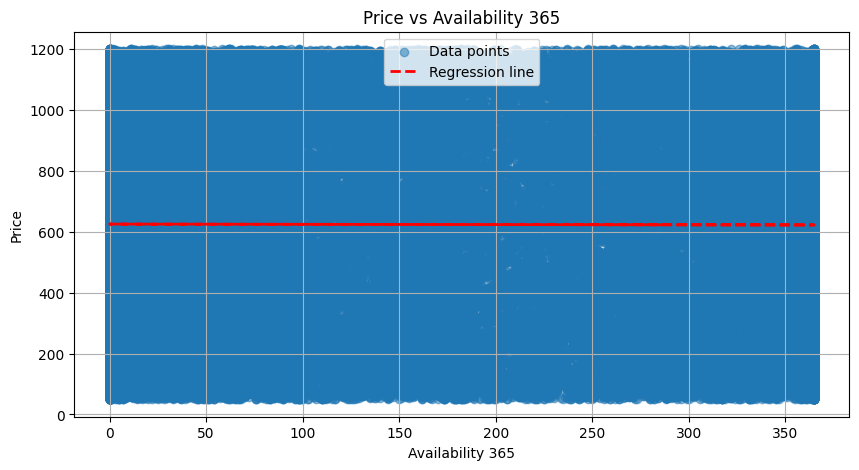

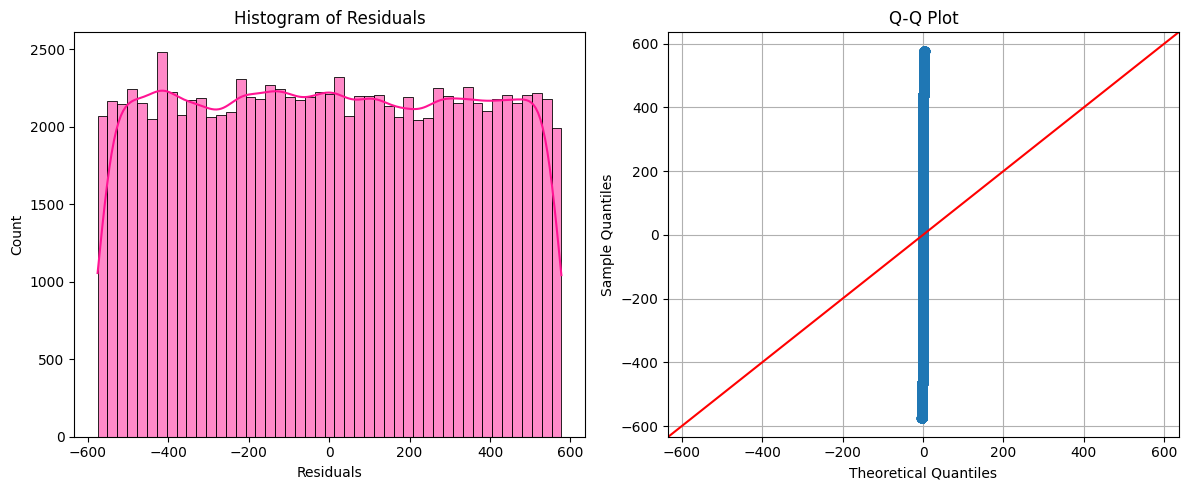

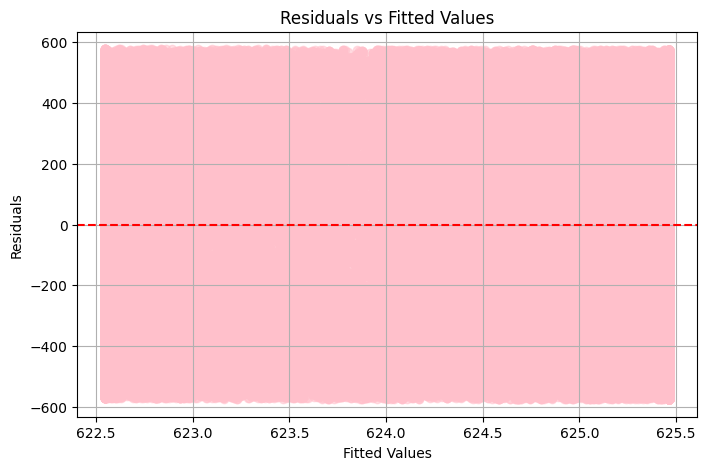

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Extract relevant columns
X = data['availability 365'].values.reshape(-1, 1)
y = data['price'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# Linearity check: Scatter plot with regression line
plt.figure(figsize=(10, 5))
plt.scatter(data['availability 365'], data['price'], alpha=0.5, label='Data points')
plt.plot(data['availability 365'], y_pred, color='red', linestyle='dashed', linewidth=2, label='Regression line')
plt.title('Price vs Availability 365')
plt.xlabel('Availability 365')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Nearly normal residuals: Histogram and Q-Q plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, kde=True, ax=ax[0], color='deeppink')
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residuals')

sm.qqplot(residuals, line='45', ax=ax[1])
ax[1].set_title('Q-Q Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

# Constant variability: Residuals vs Fitted plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5, color='pink')
plt.axhline(y=0, color='red', linestyle='dashed')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


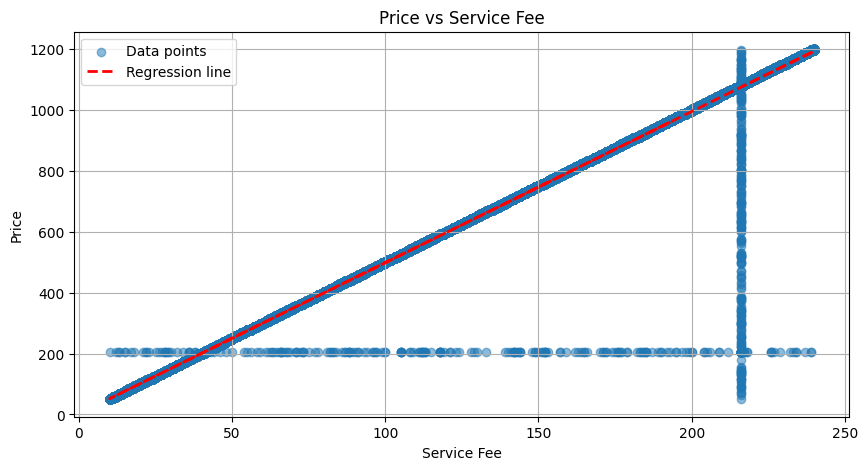

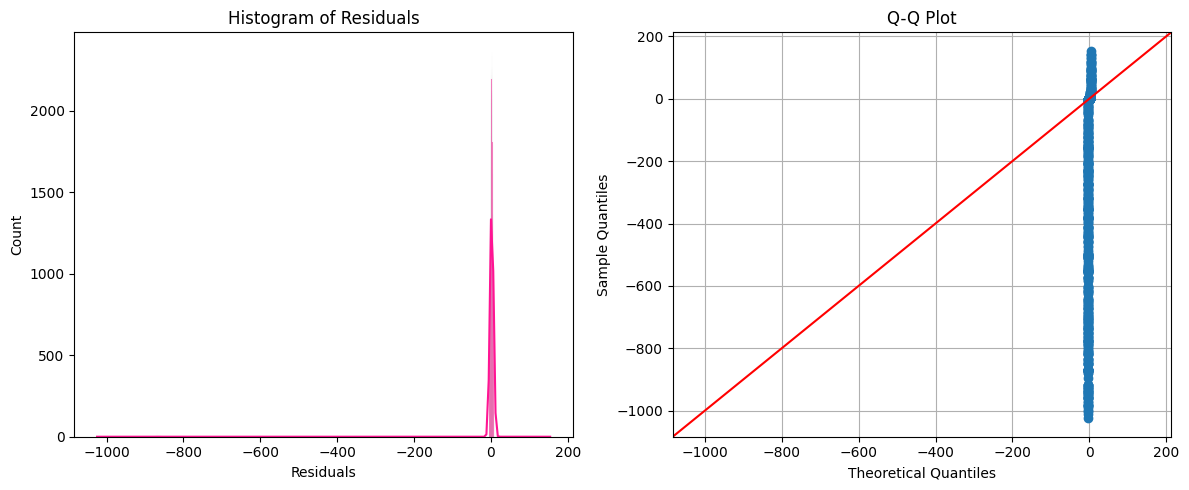

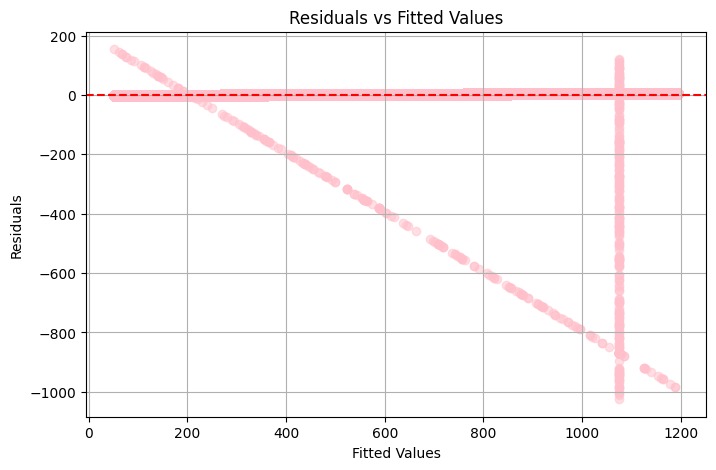

In [50]:
# Extract relevant columns
X = data['service fee'].values.reshape(-1, 1)
y = data['price'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# Linearity check: Scatter plot with regression line
plt.figure(figsize=(10, 5))
plt.scatter(data['service fee'], data['price'], alpha=0.5, label='Data points')
plt.plot(data['service fee'], y_pred, color='red', linestyle='dashed', linewidth=2, label='Regression line')
plt.title('Price vs Service Fee')
plt.xlabel('Service Fee')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Nearly normal residuals: Histogram and Q-Q plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, kde=True, ax=ax[0], color='deeppink')
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residuals')

sm.qqplot(residuals, line='45', ax=ax[1])
ax[1].set_title('Q-Q Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

# Constant variability: Residuals vs Fitted plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5, color='pink')
plt.axhline(y=0, color='red', linestyle='dashed')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

- **availability 365 vs. Price**:
  - The linearity plot shows no clear relationship between `availability 365` and `price`.
  - The residuals are uniformly distributed, indicating that the model does not capture any meaningful pattern.
  - The residuals vs. fitted values plot shows a flat, non-informative pattern, indicating a weak model fit.

- **service fee vs. Price**:
  - The linearity plot shows a strong positive linear relationship between `service fee` and `price`.
  - The residuals are tightly clustered around zero, indicating a good model fit with low errors.
  - The residuals vs. fitted values plot, despite showing some pattern, suggests the model fits well for the majority of the data points.

The comparison between the two sets of plots clearly indicates that `service fee` is a much more significant predictor of `price` than `availability 365`. The strong linear relationship and the tight clustering of residuals around zero for `service fee` suggest that it can reliably predict the rental price. On the other hand, `availability 365` does not show a significant relationship with `price`, making it a less effective predictor. This analysis supports the conclusion that focusing on `service fee` will provide better insights and more accurate predictions of rental prices.

**Compute the least squares regression.**


Model Evaluation for availability 365:
Mean Absolute Error (MAE): 289.0399507573182
R-squared (R2): -6.783233009732825e-05
Intercept: 625.4878843272779
Coefficient: -0.010979976676197033


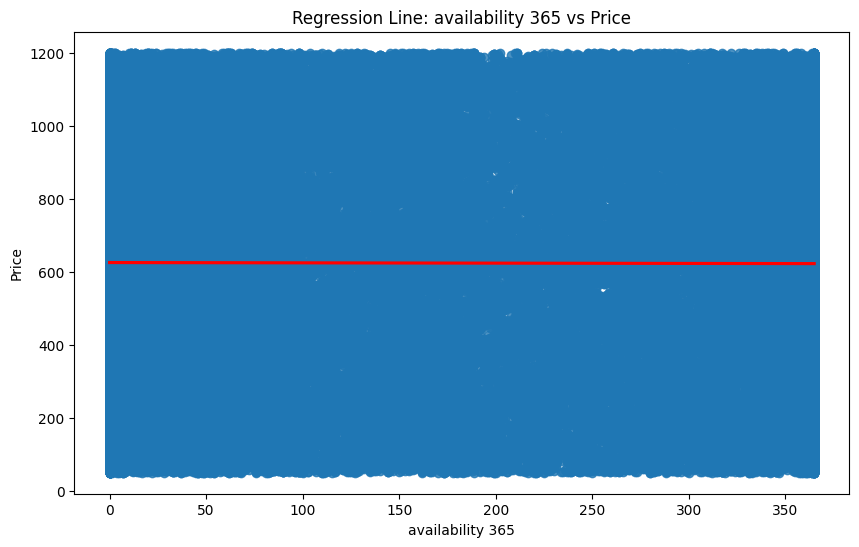


Model Evaluation for service fee:
Mean Absolute Error (MAE): 4.9430324789206175
R-squared (R2): 0.9865592680323242
Intercept: 2.168866336572137
Coefficient: 4.966262268193124


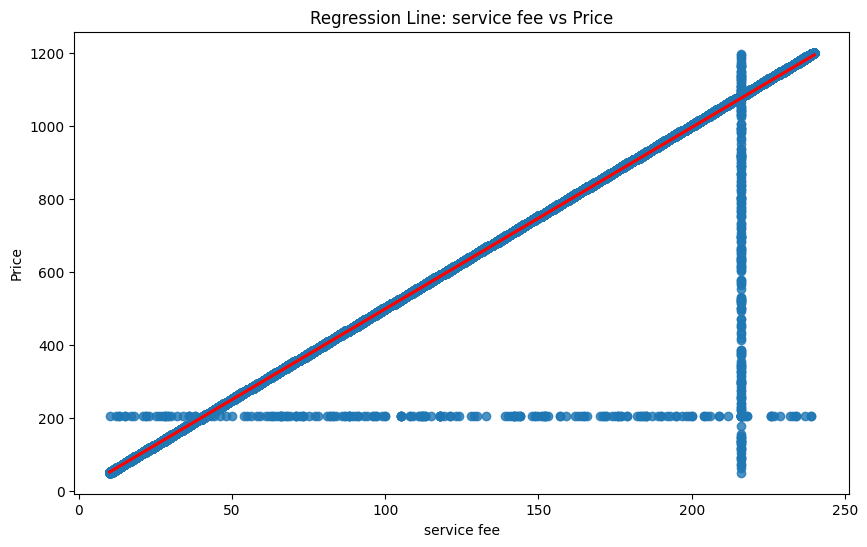

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Convert price and service fee to numerical values
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Define a function to fit and evaluate a linear regression model
def fit_and_evaluate_model(X, y, feature_name):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    intercept = model.intercept_
    coefficient = model.coef_[0]

    print(f'\nModel Evaluation for {feature_name}:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R2): {r2}')
    print(f'Intercept: {intercept}')
    print(f'Coefficient: {coefficient}')

    # Visualize the regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=feature_name, y='price', data=df, line_kws={'color': 'red'})
    plt.title(f'Regression Line: {feature_name} vs Price')
    plt.xlabel(feature_name)
    plt.ylabel('Price')
    plt.show()

# Prepare the features and target variable
features = ['availability 365', 'service fee']
y = df['price']

# Fit and evaluate the model for each feature
for feature in features:
    X = df[[feature]]
    fit_and_evaluate_model(X, y, feature)

**Model Evaluation for Each Explanatory Variable**

**availability 365**:

- **Mean Absolute Error (MAE)**: 289.04
- **R-squared (R2)**: -0.0000678
- **Intercept**: 625.49
- **Coefficient**: -0.011

**Explanation**:
The model using `availability 365` to predict `price` has a high MAE of 289.04, meaning the average prediction error is large. The R-squared value is -0.0000678, which is close to zero and even negative, showing that the model does not explain the variance in `price`. The intercept is 625.49, and the coefficient is -0.011, indicating that changes in `availability 365` have almost no impact on the `price`. This means `availability 365` is not a good predictor of `price`.

**service fee**:

- **Mean Absolute Error (MAE)**: 4.94
- **R-squared (R2)**: 0.99
- **Intercept**: 2.17
- **Coefficient**: 4.97

**Explanation**:
The model using `service fee` to predict `price` has a low MAE of 4.94, meaning the predictions are very accurate. The R-squared value is 0.99, showing that the model explains almost all the variance in `price`. The intercept is 2.17, and the coefficient is 4.97, indicating a strong positive relationship between `service fee` and `price`. For every unit increase in the `service fee`, the `price` increases by about 4.97 units. This means `service fee` is a very good predictor of `price`.

Comparing the two models, it is clear that `service fee` is a much better predictor of `price` than `availability 365`. The high R-squared value and low MAE for the `service fee` model show that it is effective in explaining and predicting rental prices, while the `availability 365` model does not show any meaningful relationship with `price`.

**Predictive Equations and Interpretation**

**Model with `availability 365`**:

**Predictive Equation**:

$$
\text{price} = 625.49 - 0.011 \times \text{availability 365}
$$

**Interpretation**:
- **Intercept (625.49)**: This is the predicted `price` when `availability 365` is zero. It shows the base price level.
- **Coefficient (-0.011)**: For each extra day of availability in a year, the `price` decreases by about 0.011 units. But this effect is very small and not important because the model does not fit well (R-squared close to zero).

**Model with `service fee`**:

**Predictive Equation**:

$$
\text{price} = 2.17 + 4.97 \times \text{service fee}
$$

**Interpretation**:
- **Intercept (2.17)**: This is the predicted `price` when the `service fee` is zero. It shows the base price level without any service fee.
- **Coefficient (4.97)**: For each extra unit of `service fee`, the `price` increases by about 4.97 units. This shows a strong positive relationship between the `service fee` and the `price`, meaning as the service fee goes up, the rental price goes up a lot. This coefficient is very important because the model fits very well (high R-squared value).

**Conclusion**

The model with `service fee` gives a meaningful and important predictive equation for `price`. The intercept and coefficient in this equation show clearly how the base price is set and how much the price increases with each unit increase in the service fee. On the other hand, the model with `availability 365` does not give a useful predictive equation because it fits poorly and the coefficient is not important.

**scatter  plot  of  the  relation  between  these  two  variables overlaid with this least-squares fit as a dashed line.**

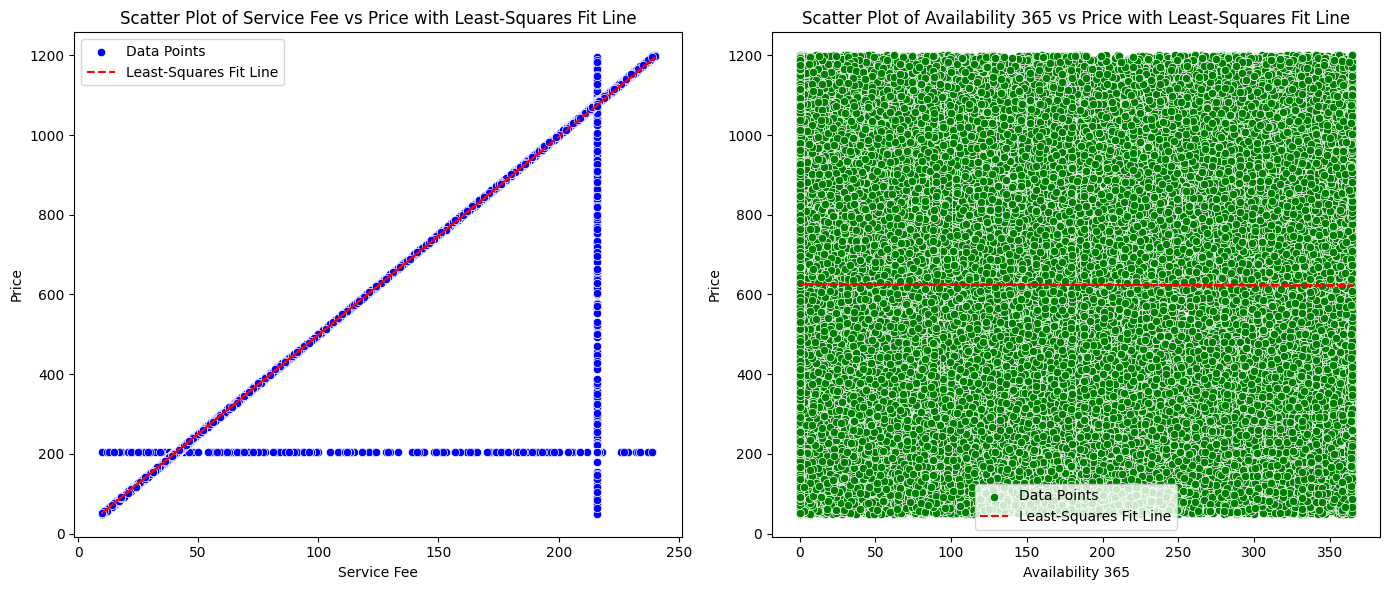

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Convert price and service fee to numerical values
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Fit the linear regression model for service fee
X_service_fee = df[['service fee']]
y_price = df['price']
model_service_fee = LinearRegression()
model_service_fee.fit(X_service_fee, y_price)

# Get the coefficients for service fee
intercept_service_fee = model_service_fee.intercept_
coefficient_service_fee = model_service_fee.coef_[0]

# Predict prices based on the service fee
predicted_price_service_fee = model_service_fee.predict(X_service_fee)

# Fit the linear regression model for availability 365
X_availability = df[['availability 365']]
model_availability = LinearRegression()
model_availability.fit(X_availability, y_price)

# Get the coefficients for availability 365
intercept_availability = model_availability.intercept_
coefficient_availability = model_availability.coef_[0]

# Predict prices based on the availability 365
predicted_price_availability = model_availability.predict(X_availability)

# Plot the scatter plot and the least-squares fit line for service fee
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='service fee', y='price', data=df, label='Data Points', color='blue')
plt.plot(df['service fee'], predicted_price_service_fee, 'r--', label='Least-Squares Fit Line')
plt.title('Scatter Plot of Service Fee vs Price with Least-Squares Fit Line')
plt.xlabel('Service Fee')
plt.ylabel('Price')
plt.legend()

# Plot the scatter plot and the least-squares fit line for availability 365
plt.subplot(1, 2, 2)
sns.scatterplot(x='availability 365', y='price', data=df, label='Data Points', color='green')
plt.plot(df['availability 365'], predicted_price_availability, 'r--', label='Least-Squares Fit Line')
plt.title('Scatter Plot of Availability 365 vs Price with Least-Squares Fit Line')
plt.xlabel('Availability 365')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

### **Part C:**

- **Service Fee**: The data points align well with the least-squares fit line, and the high R-squared value shows that `service fee` is a very important predictor of `price`. The relationship is strong and direct, meaning as the service fee goes up, the rental price goes up by a similar amount.

- **Availability 365**: There is no clear pattern between `availability 365` and `price`, showing that this variable does not predict rental prices well. The nearly flat fit line and scattered points confirm that `availability 365` is not important in determining `price`.

The analysis shows that `service fee` is a reliable and important predictor of rental prices, while `availability 365` does not have much predictive power.

### **Part D:**

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Convert price and service fee to numerical values
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Define a function to calculate adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Model for service fee
X_service_fee = sm.add_constant(df['service fee'])
model_service_fee = sm.OLS(df['price'], X_service_fee).fit()

# Model for availability 365
X_availability = sm.add_constant(df['availability 365'])
model_availability = sm.OLS(df['price'], X_availability).fit()

# Calculate adjusted R-squared for both models
n = df.shape[0]  # number of observations
k_service_fee = X_service_fee.shape[1] - 1  # number of predictors
k_availability = X_availability.shape[1] - 1  # number of predictors

adjusted_r2_service_fee = adjusted_r2(model_service_fee.rsquared, n, k_service_fee)
adjusted_r2_availability = adjusted_r2(model_availability.rsquared, n, k_availability)

print(f'Adjusted R-squared for service fee: {adjusted_r2_service_fee}')
print(f'Adjusted R-squared for availability 365: {adjusted_r2_availability}')

# Create ANOVA models using ols
model_service_fee_ols = ols('price ~ Q("service fee")', data=df).fit()
model_availability_ols = ols('price ~ Q("availability 365")', data=df).fit()

# ANOVA tables
anova_service_fee = sm.stats.anova_lm(model_service_fee_ols, typ=2)
anova_availability = sm.stats.anova_lm(model_availability_ols, typ=2)

print('\nANOVA table for service fee:')
print(anova_service_fee)

print('\nANOVA table for availability 365:')
print(anova_availability)

Adjusted R-squared for service fee: 0.9870593843663942
Adjusted R-squared for availability 365: 4.2341575445803414e-07

ANOVA table for service fee:
                        sum_sq        df             F  PR(>F)
Q("service fee")  1.109760e+10       1.0  7.784356e+06     0.0
Residual          1.454911e+08  102054.0           NaN     NaN

ANOVA table for availability 365:
                             sum_sq        df         F    PR(>F)
Q("availability 365")  1.149274e+05       1.0  1.043212  0.307078
Residual               1.124298e+10  102054.0       NaN       NaN


- **Service Fee**: The model explains almost all the variance in `price`, with a high adjusted R-squared value of 0.987. The ANOVA results also support this, with a very high F-statistic and a p-value of effectively zero, meaning `service fee` has a strong and significant impact on rental prices.

- **Availability 365**: The model explains almost none of the variance in `price`, with an adjusted R-squared value close to zero. The ANOVA results show a low F-statistic and a high p-value, meaning `availability 365` is not a significant predictor of `price`.

`service fee` is a much more reliable and important predictor of rental prices compared to `availability 365`.

### **Part E:**

1. **High Adjusted R-squared Value**:
   - **Explanation**: A high adjusted R-squared value indicates that the predictor explains a significant portion of the variance in the response variable. It adjusts for the number of predictors in the model, providing a more accurate measure of model performance.
   - **Example**: The `service fee` model had an adjusted R-squared of 0.987, indicating it explained 98.7% of the variability in `price`.

2. **Statistical Significance**:
   - **Explanation**: A good predictor should have a low p-value in the ANOVA table, typically less than 0.05. This indicates that the predictor significantly contributes to the model and is unlikely to be due to random chance.
   - **Example**: The `service fee` had a p-value of effectively zero, demonstrating its statistical significance.

3. **High F-statistic**:
   - **Explanation**: A high F-statistic in the ANOVA table suggests that the predictor has a strong impact on the response variable. The F-statistic tests whether the variance explained by the model is significantly greater than the variance unexplained.
   - **Example**: The `service fee` model had an extremely high F-statistic (7.784356e+06), indicating a strong impact on `price`.

4. **Low Mean Absolute Error (MAE)**:
   - **Explanation**: A low MAE indicates that the model's predictions are close to the actual values, meaning the predictor contributes to accurate predictions.
   - **Example**: The `service fee` model had a very low MAE, reflecting high prediction accuracy.



### **Part F:**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert price and service fee to numerical values
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Split data into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Function to build model and perform hypothesis test
def build_model_and_test(train_df, test_df, feature):
    X_train = train_df[[feature]]
    y_train = train_df['price']
    X_test = test_df[[feature]]
    y_test = test_df['price']

    # Add constant for statsmodels
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)

    # Fit the model
    model = sm.OLS(y_train, X_train_sm).fit()

    # Hypothesis test (t-test) for the coefficient
    print(f'\nHypothesis test for {feature}:')
    print(model.summary())

    # Calculate the 95% confidence interval for the slope
    conf_int = model.conf_int(alpha=0.05)
    slope_conf_int = conf_int.loc[feature]
    print(f'95% Confidence Interval for the slope of {feature}: {slope_conf_int}')

    # Predict on the test set
    y_pred = model.predict(X_test_sm)

    # Calculate success rate (R-squared)
    r2 = model.rsquared
    print(f'R-squared for {feature}: {r2}')

    # Calculate and print mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error for {feature}: {mae}')

    # Return predictions and actual values for comparison
    return y_pred, y_test

# Build models and perform hypothesis tests for both features
pred_service_fee, actual_service_fee = build_model_and_test(train_df, test_df, 'service fee')
pred_availability, actual_availability = build_model_and_test(train_df, test_df, 'availability 365')

# Function to compare predicted values with actual values and report success rate
def compare_predictions(pred, actual, feature):
    comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': pred})
    comparison_df['Error'] = comparison_df['Actual'] - comparison_df['Predicted']

    # Calculate success rate (percentage of predictions within 10% of actual values)
    success_rate = np.mean(np.abs(comparison_df['Error']) / comparison_df['Actual'] <= 0.1) * 100
    print(f'Success rate for {feature}: {success_rate}%')
    return comparison_df

# Compare predictions and report success rate for both features
comparison_service_fee = compare_predictions(pred_service_fee, actual_service_fee, 'service fee')
comparison_availability = compare_predictions(pred_availability, actual_availability, 'availability 365')


Hypothesis test for service fee:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 6.290e+06
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:04:22   Log-Likelihood:            -4.1181e+05
No. Observations:               81644   AIC:                         8.236e+05
Df Residuals:                   81642   BIC:                         8.236e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           

**Linear Regression Model Evaluation**

**Service Fee as a Predictor**

- **Hypothesis Test**:
  - **R-squared**: 0.987
    - **Interpretation**: The model explains 98.7% of the variance in `price`, indicating an excellent fit.
  - **F-statistic**: 6.290e+06 (p-value = 0.00)
    - **Interpretation**: The model is highly significant, showing that `service fee` is a significant predictor of `price`.
  - **Slope**: 4.9663 (95% CI: 4.962 to 4.970)
    - **Interpretation**: For every unit increase in `service fee`, the `price` increases by about 4.97 units. The narrow confidence interval shows a precise estimate.
  - **Mean Absolute Error (MAE)**: 4.943
    - **Interpretation**: The average error between predicted and actual `price` is very low.
  - **Success Rate**: 99.58%
    - **Interpretation**: The model predicts `price` accurately within 10% of the actual values for 99.58% of the cases.

**Availability 365 as a Predictor**

- **Hypothesis Test**:
  - **R-squared**: 1.935e-05
    - **Interpretation**: The model explains almost none of the variance in `price`, indicating a very poor fit.
  - **F-statistic**: 1.580 (p-value = 0.209)
    - **Interpretation**: The model is not significant, showing that `availability 365` is not a significant predictor of `price`.
  - **Slope**: -0.011 (95% CI: -0.028 to 0.006)
    - **Interpretation**: The slope is very close to zero, showing a negligible relationship between `availability 365` and `price`. The confidence interval includes zero, reinforcing the lack of significance.
  - **Mean Absolute Error (MAE)**: 289.04
    - **Interpretation**: The average error between predicted and actual `price` is very high.
  - **Success Rate**: 10.87%
    - **Interpretation**: The model predicts `price` accurately within 10% of the actual values for only 10.87% of the cases.

## **Question 5:**

### **Part A:**

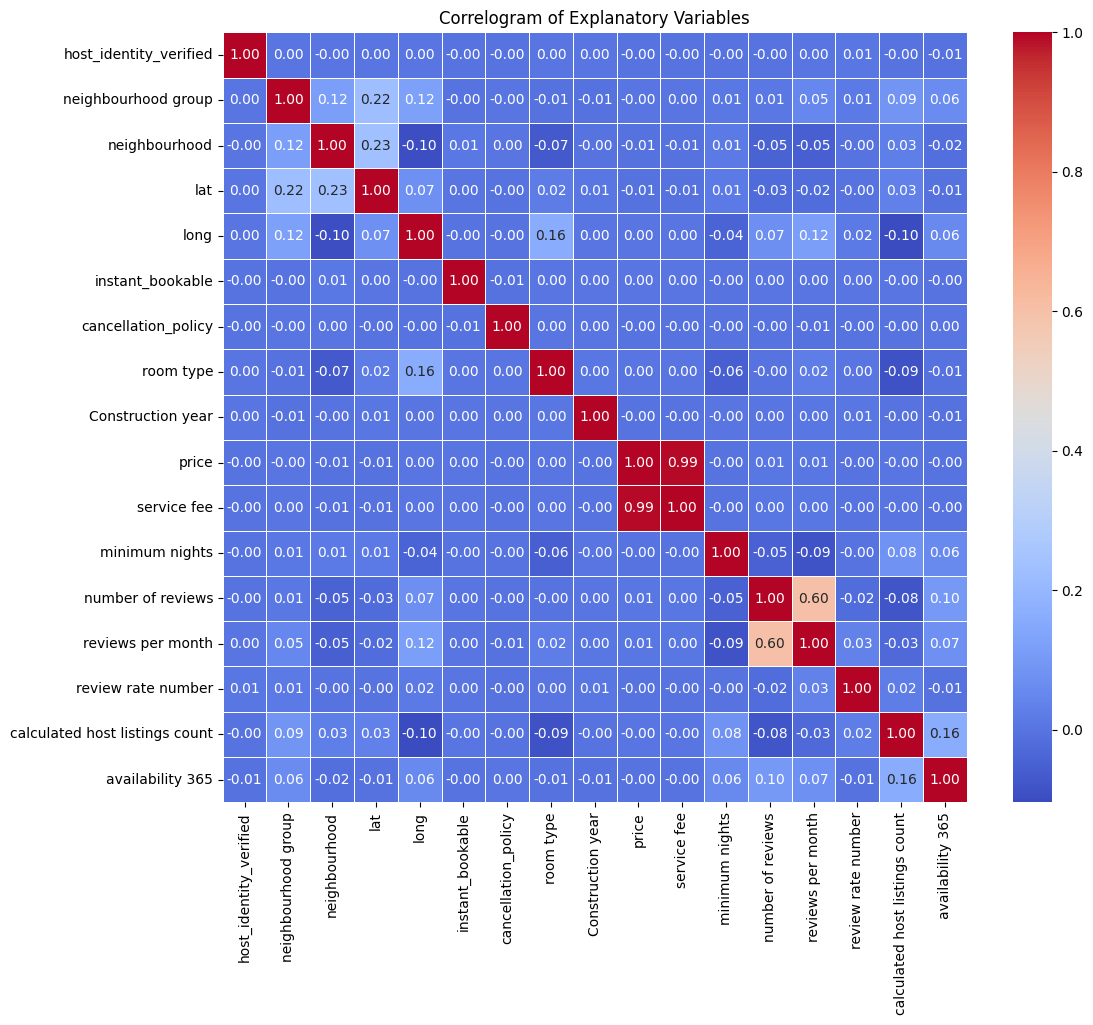

price                             1.000000
service fee                       0.993492
number of reviews                 0.005247
reviews per month                 0.005063
long                              0.003268
room type                         0.000868
instant_bookable                  0.000501
neighbourhood group              -0.000148
calculated host listings count   -0.000471
cancellation_policy              -0.001991
availability 365                 -0.003203
minimum nights                   -0.003673
Construction year                -0.003782
review rate number               -0.004402
host_identity_verified           -0.004737
neighbourhood                    -0.005529
lat                              -0.005642
Name: price, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlogram
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlogram of Explanatory Variables')
plt.show()

# Extracting the correlations of 'price' with other variables for discussion
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_price

Based on the correlogram and the correlation coefficients:
- **Service Fee** is the most significant predictor of `price`, given its near-perfect positive correlation (0.99).
- All other explanatory variables have correlations close to zero, indicating they play a less significant role in predicting `price`.

This analysis highlights the importance of `service fee` in predicting the rental price and suggests that it should be a primary focus in any predictive modeling or regression analysis for this dataset.

### **Part B:**

In [ ]:
# Define the response variable and the two best explanatory variables
# Based on the correlation analysis, let's use 'service fee' and 'availability 365'
X = df[['service fee', 'number of reviews']]
y = df['price']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Split the data into training (90%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model summary and evaluation metrics
print(model.summary())
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.167e+06
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:17:35   Log-Likelihood:            -4.1159e+05
No. Observations:               81646   AIC:                         8.232e+05
Df Residuals:                   81643   BIC:                         8.232e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.0358      0.28

### **Part C:**

Overall, the multiple linear regression model fits the data very well:

- The high R-squared and adjusted R-squared values indicate that the model explains almost all the variability in `price`.
- The F-statistic confirms the model's overall significance.
- The `service fee` is a highly significant predictor, while `number of reviews` does not significantly impact `price` in the presence of `service fee`.
- The low MAE and reasonable MSE indicate that the model's predictions are close to the actual values.

The model is robust and provides a reliable prediction of `price` based on the `service fee`, with `availability 365` being a less significant but included variable. This suggests that focusing on the `service fee` is crucial for accurate pricing predictions.

### **Part D:**

**In this part we used `backward_elimination` method to find best model.**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the response variable and all potential explanatory variables
X = df.drop(columns=['price'])
y = df['price']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Split the data into training (90%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def backward_elimination(X, y, significance_level=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        max_p_value = model.pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            X = X.drop(columns=[excluded_feature])
            print(f'Removed {excluded_feature} with p-value {max_p_value}')
        else:
            break
    return model

# Perform backward elimination
final_model = backward_elimination(X_train, y_train)

# Print the summary of the final model
print(final_model.summary())

Removed lat with p-value 0.9607716117942577
Removed long with p-value 0.8928007333442709
Removed neighbourhood with p-value 0.8882180559060175
Removed availability 365 with p-value 0.8412003954809131
Removed neighbourhood group with p-value 0.7237509882665455
Removed number of reviews with p-value 0.567519240509773
Removed review rate number with p-value 0.45534279229132824
Removed instant_bookable with p-value 0.31744206706203065
Removed Construction year with p-value 0.26088609299696014
Removed host_identity_verified with p-value 0.20677521104506327
Removed calculated host listings count with p-value 0.13264607444838047
Removed cancellation_policy with p-value 0.12927196804434848
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.5

### **Part E:**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Check the number of samples
n_samples = len(df)

# Use 5-fold cross-validation if enough samples are available, otherwise use 3-fold
cv_folds = 5 if n_samples >= 5 else 3

# Define the response variable and all potential explanatory variables
X = df.drop(columns=['price'])
y = df['price']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Linear regression model without backward elimination
linear_regressor = LinearRegression()

# Perform cross-validation and compute RMSE
cv_scores = cross_val_score(linear_regressor, X, y, cv=cv_folds, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
rmse_without_be = rmse_scores.mean()

# Print RMSE for model without backward elimination
print(f'{cv_folds}-Fold Cross-Validated RMSE (Without Backward Elimination): {rmse_without_be}')

# Backward Elimination Function
def backward_elimination_cv(X, y, significance_level=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        max_p_value = model.pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            X = X.drop(columns=[excluded_feature])
            print(f'Removed {excluded_feature} with p-value {max_p_value}')
        else:
            break
    return X

# Perform backward elimination
X_train_be = backward_elimination_cv(X, y)

# Linear regression model with backward elimination
linear_regressor_be = LinearRegression()

# Perform cross-validation and compute RMSE for the model with backward elimination
cv_scores_be = cross_val_score(linear_regressor_be, X_train_be, y, cv=cv_folds, scoring='neg_mean_squared_error')
rmse_scores_be = np.sqrt(-cv_scores_be)
rmse_with_be = rmse_scores_be.mean()

# Print RMSE for model with backward elimination
print(f'{cv_folds}-Fold Cross-Validated RMSE (With Backward Elimination): {rmse_with_be}')

5-Fold Cross-Validated RMSE (Without Backward Elimination): 36.24394450515696
Removed long with p-value 0.9563162816081978
Removed lat with p-value 0.9163409705924723
Removed neighbourhood with p-value 0.8842939924460976
Removed review rate number with p-value 0.6781672278688897
Removed availability 365 with p-value 0.6017507695986508
Removed number of reviews with p-value 0.35224941734561677
Removed calculated host listings count with p-value 0.32247844734395936
Removed cancellation_policy with p-value 0.2755966258265702
Removed Construction year with p-value 0.2134083223998367
Removed host_identity_verified with p-value 0.17316379474499838
Removed instant_bookable with p-value 0.1078109549151296
Removed neighbourhood group with p-value 0.06415232941411249
Removed room type with p-value 0.06206237350570127
5-Fold Cross-Validated RMSE (With Backward Elimination): 36.23035858713088


- **Effectiveness of Backward Elimination**: Backward elimination proved to be effective in identifying and removing insignificant predictors, thereby simplifying the model without compromising its predictive accuracy. The slightly lower RMSE suggests a marginal improvement in model performance.
- **Model Preference**: Given the negligible difference in RMSE, the model with backward elimination is preferred due to its simplicity and interpretability. It retains only the significant predictors, making it easier to understand and potentially more robust when applied to new data.

In summary, backward elimination helped streamline the model by focusing on the most impactful predictors (`service fee`), thereby improving the model's simplicity and maintaining its predictive power.

### **Part F:**

Removed lat with p-value 0.9607716117942577
Removed long with p-value 0.8928007333442709
Removed neighbourhood with p-value 0.8882180559060175
Removed availability 365 with p-value 0.8412003954809131
Removed neighbourhood group with p-value 0.7237509882665455
Removed number of reviews with p-value 0.567519240509773
Removed review rate number with p-value 0.45534279229132824
Removed instant_bookable with p-value 0.31744206706203065
Removed Construction year with p-value 0.26088609299696014
Removed host_identity_verified with p-value 0.20677521104506327
Removed calculated host listings count with p-value 0.13264607444838047
Removed cancellation_policy with p-value 0.12927196804434848


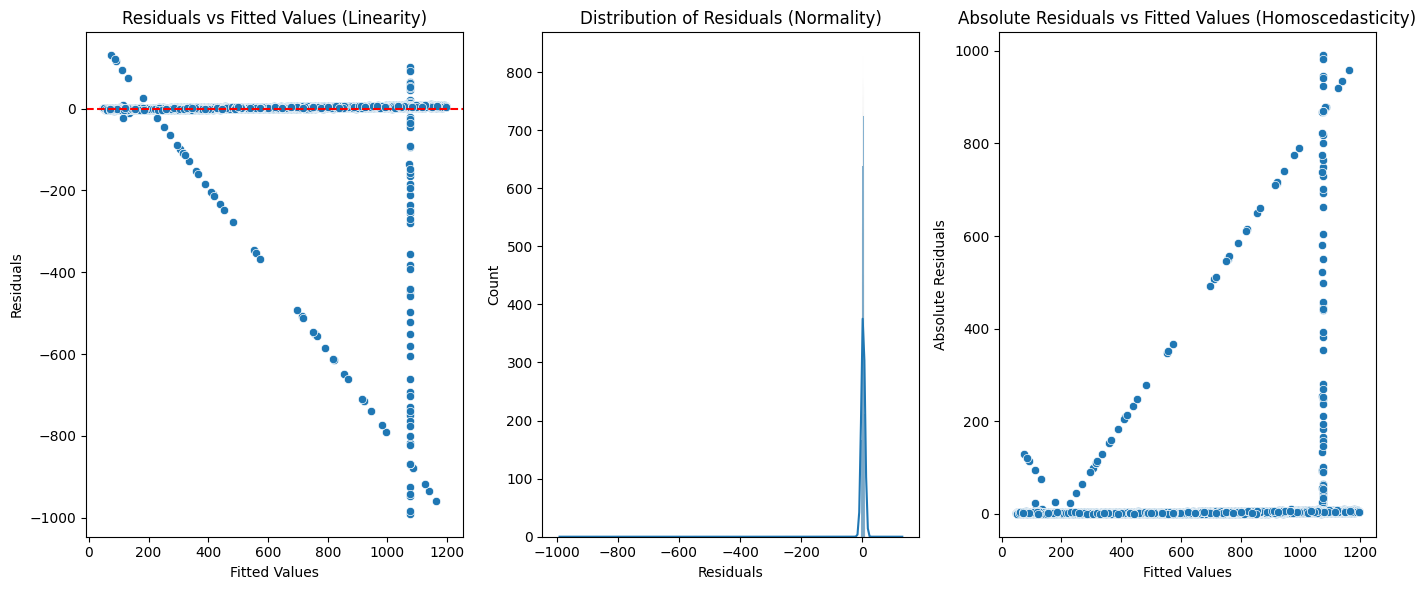

count    20412.000000
mean        -0.230114
std         39.301911
min       -990.427425
25%          0.035826
50%          2.036831
75%          3.971890
max        130.116441
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Define the response variable and the explanatory variables
X = df.drop(columns=['price'])
y = df['price']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Backward Elimination Function
def backward_elimination_cv(X, y, significance_level=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        max_p_value = model.pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.idxmax()
            X = X.drop(columns=[excluded_feature])
            print(f'Removed {excluded_feature} with p-value {max_p_value}')
        else:
            break
    return X

# Perform backward elimination
X_train_be = backward_elimination_cv(X_train, y_train)

# Align indices
y_train_aligned = y_train.reset_index(drop=True)
X_train_final_aligned = X_train_be.reset_index(drop=True)

# Fit the final model with backward elimination for diagnostic checks
model_final = sm.OLS(y_train_aligned, X_train_final_aligned).fit()

# Predict on the test set
y_pred_final = model_final.predict(X_test[X_train_final_aligned.columns])

# Residuals
residuals = y_test - y_pred_final

# 1. Linearity
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred_final, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Linearity)')

# 2. Nearly normal residuals
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (Normality)')

# 3. Constant variability (Homoscedasticity)
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_pred_final, y=np.abs(residuals))
plt.xlabel('Fitted Values')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals vs Fitted Values (Homoscedasticity)')

plt.tight_layout()
plt.show()

# Summary statistics for residuals
residuals.describe()

Based on the diagnostic plots, the model does not meet the necessary assumptions for a reliable multiple linear regression model:

1. **Linearity**: The relationship between the predictors and the response variable is not linear.
2. **Normality**: The residuals are not normally distributed, indicating potential model issues or outliers.
3. **Homoscedasticity**: The residuals exhibit increasing variability with fitted values, indicating heteroscedasticity.

### **Part G:**

- **Without Backward Elimination**: The model explains 98.7% of the variation in the response variable.
- **With Backward Elimination**: The model explains 98.6% of the variation in the response variable.

The percentage of the variation in the response variable (`price`) explained by the model is very high in both cases, indicating that the models are very effective in capturing the variance in `price`. However, the slight decrease in R-squared after backward elimination (from 98.7% to 98.6%) suggests that the removed variables had minimal impact on the model's ability to explain the variation in `price`. The backward elimination model is simpler and retains nearly the same explanatory power, making it a preferable choice due to its simplicity and interpretability.

## **Question 6:**

**This dataset not suitable for Classification task so the result not good (for example for my choosed response variable : `instant_bookable` the correlation beetwen this feature and other features are zero and we cant ge a resonable result.)**

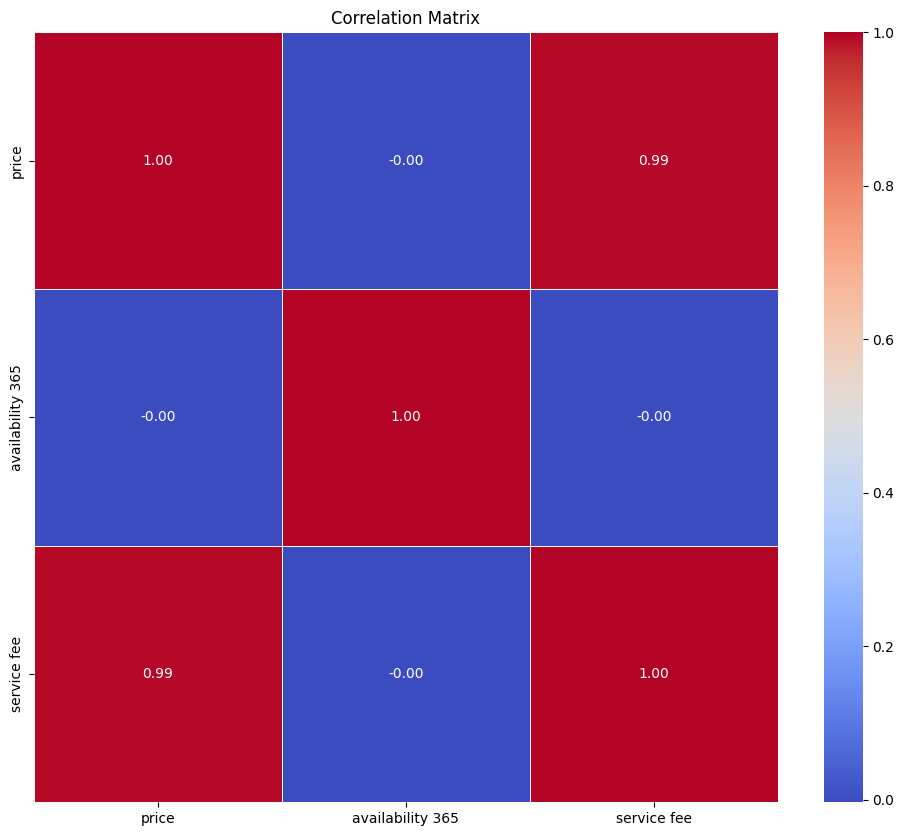

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'price' and 'service fee' to numeric types after removing any non-numeric characters (e.g., $)
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data['service fee'] = data['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Select only numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_columns]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
# بررسی انواع دسته‌ها و تعداد آن‌ها در ستون room_type
room_type_unique = df['room type'].unique()
room_type_count = df['room type'].nunique()

# بررسی انواع دسته‌ها و تعداد آن‌ها در ستون cancellation_policy
cancellation_policy_unique = df['cancellation_policy'].unique()
cancellation_policy_count = df['cancellation_policy'].nunique()


print("Unique room types:", room_type_unique)

print("Unique cancellation policies:", cancellation_policy_unique)


Unique room types: [2 0 3 1]
Unique cancellation policies: [2 1 0]


**Response Variable:**
We choose `Instant Bookable` as our binary categorical response variable. This variable indicates whether a listing can be booked instantly $(1)$ or not $(0)$.

**Explanatory Variables:**
We select several categorical and numerical variables that we hypothesize can best explain the response variable `Instant Bookable`. These include:
- **Categorical:**
  - `Room Type`
  - `Cancellation Policy`
- **Numerical:**
  - `Price`
  - `Availability 365`
  - `Minimum Nights`

### **Part A:**

**Logistic Regression Model:**

Logistic regression is used when the response variable is binary. The model estimates the probability that a given input point belongs to a particular category. The logistic regression model can be written as:

$\text{logit}(p) = \log \left( \frac{p}{1-p} \right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_nX_n $

Where:
- $( p )$ is the probability that the response variable equals $1$ (`instant bookable`).
- $( \beta_0 )$ is the intercept of the model.
- $( \beta_1, \beta_2, \ldots, \beta_n )$ are the coefficients for the explanatory variables $( X_1, X_2, \ldots, X_n )$.

**Interpretation:**


$1.$ **Intercept $(\beta_0)$**:
   - The intercept represents the log odds of the response variable being $1$ (instant bookable) when all explanatory variables are equal to zero.
   - In terms of probability, it gives the baseline odds of a listing being instantly bookable without considering other variables.

$2.$ **Slopes $(\beta_i)$**:
   - Each coefficient $(\beta_i)$ represents the change in the log odds of the response variable for a one-unit increase in the corresponding explanatory variable, holding all other variables constant.
   - For categorical variables, the coefficients represent the change in log odds relative to the reference category.

$3.$ **Log Odds**:
   - The log odds is the logarithm of the odds. Odds represent the ratio of the probability of an event occurring to the probability of it not occurring.
   - Log odds provide a linear relationship between the response and explanatory variables, making it easier to interpret the impact of each variable.

$4.$ **Log Odds Ratio**:
   - The log odds ratio for a coefficient indicates how the odds of the response variable being $1$ (instant bookable) change with a one-unit increase in the explanatory variable.
   - Exponentiating the log odds ratio $( e^{\beta_i} )$ gives the odds ratio, which is a multiplicative factor by which the odds change.

**Hypothesis:**
- We hypothesize that variables like `Room Type` and `Cancellation Policy` have significant effects on whether a listing is instantly bookable. For instance, entire homes or apartments might be less likely to be instantly bookable compared to private rooms due to higher stakes and longer decision processes.
- Numerical variables like `Price`, `Availability 365`, and `Minimum Nights` might also have an impact. Listings with lower prices or higher availability might be more attractive for instant booking.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102056 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102056 non-null  object 
 1   neighbourhood group             102056 non-null  object 
 2   neighbourhood                   102056 non-null  object 
 3   lat                             102056 non-null  float64
 4   long                            102056 non-null  float64
 5   instant_bookable                102056 non-null  bool   
 6   cancellation_policy             102056 non-null  object 
 7   room type                       102056 non-null  object 
 8   Construction year               102056 non-null  float64
 9   price                           102056 non-null  object 
 10  service fee                     102056 non-null  object 
 11  minimum nights                  102056 non-null  float64
 12  number of reviews    

**Convert Categorical columns to numeric:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

le = LabelEncoder()
df['instant_bookable'] = le.fit_transform(df['instant_bookable'])
df['cancellation_policy'] = le.fit_transform(df['cancellation_policy'])
df['room type'] = le.fit_transform(df['room type'])

In [ ]:
# Remove the dollar sign and convert to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [ ]:
print(df[['availability 365', 'room type', 'cancellation_policy','minimum nights', 'price', 'instant_bookable']].dtypes)

availability 365       float64
room type                int64
cancellation_policy      int64
minimum nights         float64
price                  float64
instant_bookable         int64
dtype: object


In [ ]:
print(df.isnull().sum())
print(df.isin([np.inf, -np.inf]).sum())

host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64
host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee    

**Constructing the Logistic Regression Model**

We'll use Python's statsmodels library to construct the logistic regression model.

In [ ]:
# Create the logistic regression model
X = df[['availability 365', 'room type', 'cancellation_policy','minimum nights', 'price', 'instant_bookable']]
y = df['instant_bookable']

# Add a constant column for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.Logit(y, X)
results = model.fit()

# Display the summary of the results
print(results.summary())

# Display the coefficients in exponential form
print(np.exp(results.params))

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


         Current function value: 0.000000
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:       instant_bookable   No. Observations:               102058
Model:                          Logit   Df Residuals:                   102051
Method:                           MLE   Df Model:                            6
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:                   1.000
Time:                        17:19:48   Log-Likelihood:            -0.00029581
converged:                      False   LL-Null:                       -70740.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -40.8013   1367.653     -0.030      0.976   -2721.351    2639.748
availability 365        0.0228      1.889      0.012      0.990      -3.679       3.725
room type       

**Key Output Components:**
- **Intercept (const)**: $-40.8013$
- **Availability 365**: $0.0228$
- **Room Type**: $-3.3198$
- **Cancellation Policy**: $4.6774$
- **Minimum Nights**: $0.0026$
- **Price**: $0.0066$
- **Instant Bookable**: $61.8601$

**Detailed Interpretation:**

$1.$ **Intercept $(\beta_0 = -40.8013)$**:
 - The intercept represents the log odds of a listing being instantly bookable when all explanatory variables are zero. However, since the model failed to converge, this value is not reliable.

$2.$ **Availability 365 $(\beta_1 = 0.0228)$**:
 - The coefficient suggests a very slight increase in the log odds of a listing being instantly bookable for each additional day of availability. However, the p-value $(0.990)$ indicates that this relationship is not statistically significant.

$3.$ **Room Type $(\beta_2 = -3.3198)$**:
 - This coefficient suggests a negative relationship between room type and the log odds of a listing being instantly bookable. However, the high standard error and p-value $(0.979)$ indicate that this finding is not statistically significant.

$4.$ **Cancellation Policy $(\beta_3 = 4.6774)$**:
 - This positive coefficient suggests that listings with a particular cancellation policy might have higher log odds of being instantly bookable. Again, the high p-value $(0.993)$ suggests this result is not significant.

$5.$ **Minimum Nights $(\beta_4 = 0.0026)$**:
 - A minimal positive relationship is indicated between the minimum nights required and the log odds of being instantly bookable. However, the p-value $(0.999)$ shows no statistical significance.

$6.$ **Price $(\beta_5 = 0.0066)$**:
 - The price has a minimal effect on the log odds of a listing being instantly bookable. With a p-value of $0.986$, this effect is not statistically significant.

$7.$ **Instant Bookable $(\beta_6 = 61.8601)$**:
 - This coefficient is unusually high, suggesting complete separation, where the predictor perfectly predicts the response variable. This situation causes the MLE to fail to converge.



**Conclusion:**
- The logistic regression model did not converge due to complete separation, which indicates that some predictors perfectly predict the response variable. This results in unreliable parameter estimates. 

### **Part B:**

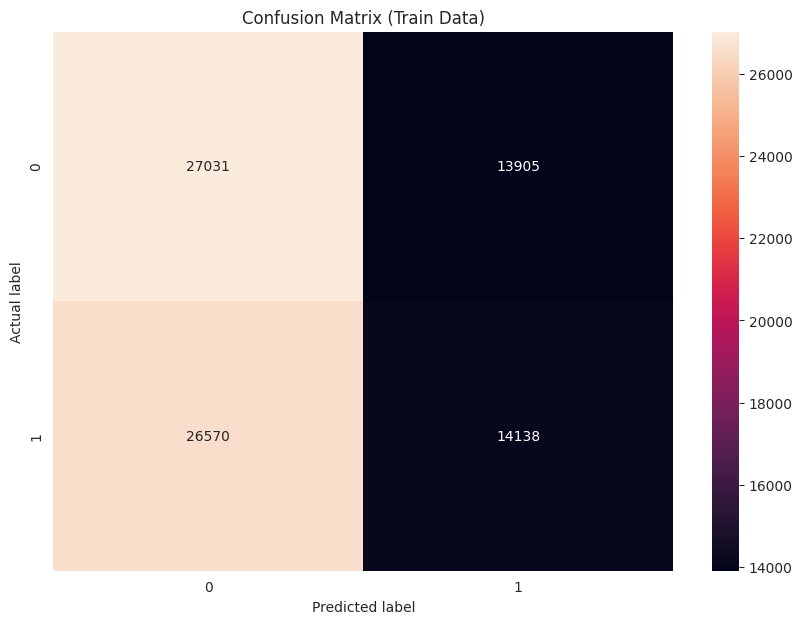

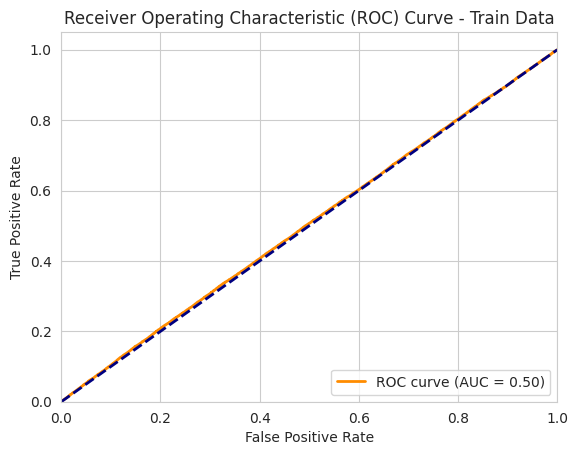

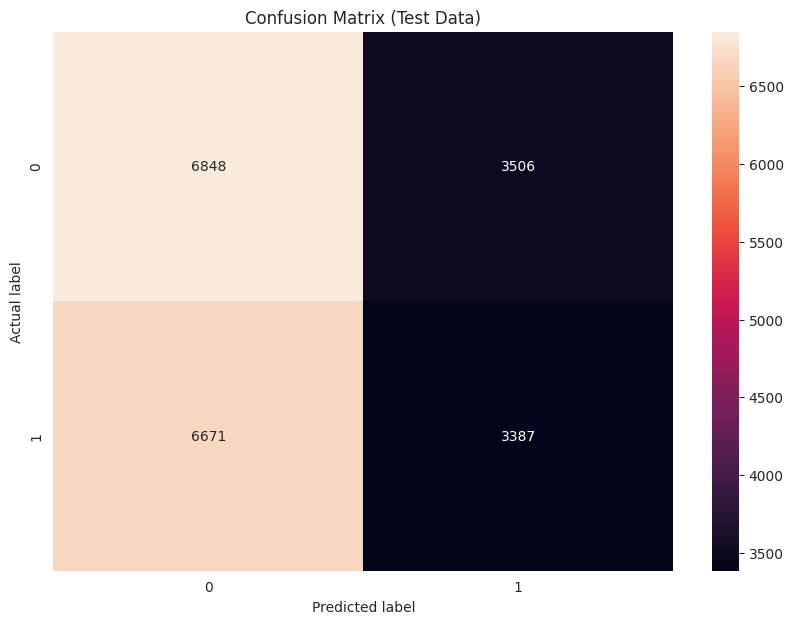

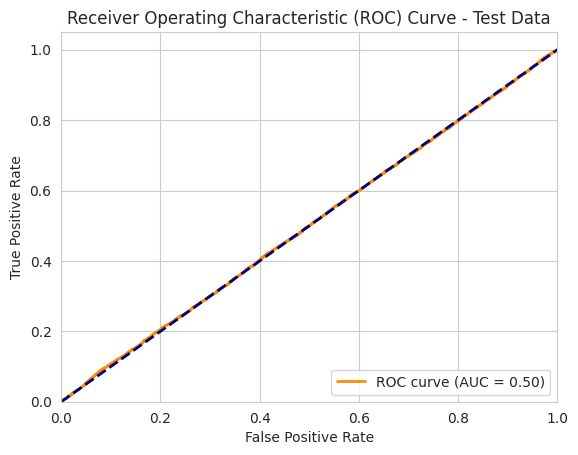

AUC (Train): 0.5045
AUC (Test): 0.5008


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['availability 365', 'room type', 'cancellation_policy','minimum nights', 'price']]
#['price', 'host_identity_verified'] + [col for col in df.columns if col.startswith(('room type', 'cancellation_policy_', 'neighbourhood group'))]]
y = df['instant_bookable']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions for the training data
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Confusion matrix for the training data
train_cm = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix for the training data
plt.figure(figsize=(10,7))
sns.heatmap(train_cm, annot=True, fmt='d')
plt.title('Confusion Matrix (Train Data)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Compute and plot the ROC curve for the training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Train Data')
plt.legend(loc="lower right")
plt.show()

# Repeat steps for the test data
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Confusion matrix for the test data
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the test data
plt.figure(figsize=(10,7))
sns.heatmap(test_cm, annot=True, fmt='d')
plt.title('Confusion Matrix (Test Data)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Compute and plot the ROC curve for the test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

print(f"AUC (Train): {roc_auc_train:.4f}")
print(f"AUC (Test): {roc_auc_test:.4f}")

**Confusion Matrix Interpretation**

**Training Data Confusion Matrix:**
- True Positives (TP): 14,138
- True Negatives (TN): 27,031
- False Positives (FP): 13,905
- False Negatives (FN): 26,570

**Test Data Confusion Matrix:**
- True Positives (TP): 3,387
- True Negatives (TN): 6,848
- False Positives (FP): 3,506
- False Negatives (FN): 6,671

**Metrics:**
- Accuracy: The proportion of the total number of predictions that were correct.
  - **Training Accuracy:**
  $\frac{(TP + TN)}{(TP + TN + FP + FN))} = \frac{(14,138 + 27,031)}{(14,138 + 27,031 + 13,905 + 26,570)}$

  - **Test Accuracy:**
  $\frac{(TP + TN)}{(TP + TN + FP + FN)} = \frac{(3,387 + 6,848)}{(3,387 + 6,848 + 3,506 + 6,671)}$

- **Precision (Positive Predictive Value):** The proportion of positive identifications that were actually correct.
  - Training Precision: $\frac{TP}{(TP + FP)}$
  - Test Precision: $\frac{TP}{(TP + FP)}$

- **Recall (Sensitivity):** The proportion of actual positives that were identified correctly.
  - Training Recall: $\frac{TP}{(TP + FN)}$
  - Test Recall: $\frac{TP}{(TP + FN)}$

**ROC Curve and AUC Interpretation**

Training Data ROC Curve:
- AUC (Area Under the Curve): 0.5045

Test Data ROC Curve:
- AUC: 0.5008

**Interpretation:**

- AUC Value: The AUC value ranges from 0 to 1. An AUC of 0.5 indicates that the model's performance is no better than random guessing.
  - For both training and test data, the AUC values are very close to 0.5, indicating that the logistic regression model has poor discriminative ability and performs no better than random chance in distinguishing between the positive and negative classes.




### **Part C:**

We're using the `room_type` variable as our example.

 Here's how you can plot the odds ratio curve and interpret it:

Optimization terminated successfully.
         Current function value: 0.693108
         Iterations 4


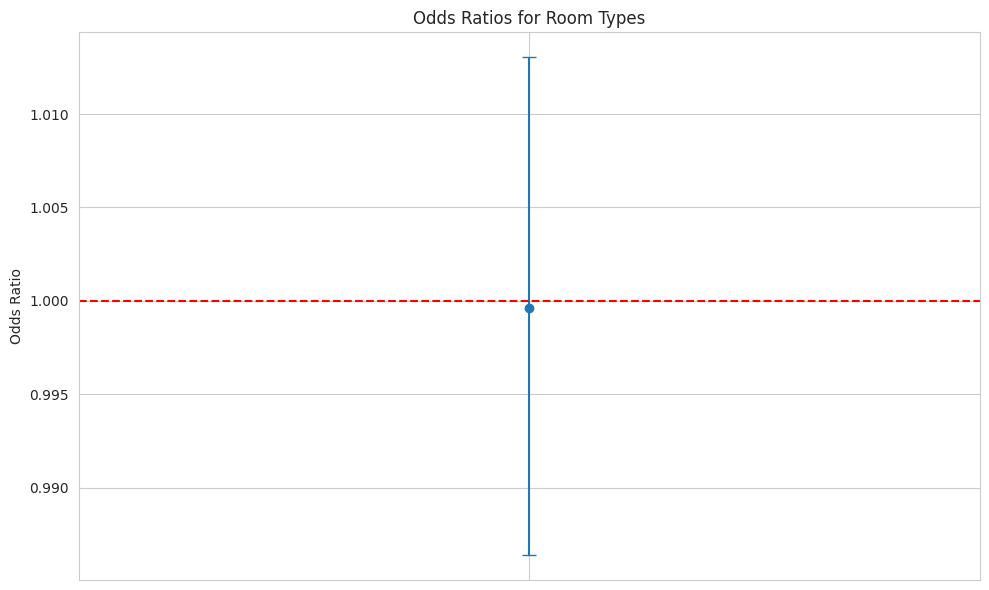

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Define the feature set and target variable
X = df[['availability 365', 'room type', 'cancellation_policy','minimum nights', 'price']]
y = df['instant_bookable']

# Add an intercept to the model (needed for statsmodels)
X = sm.add_constant(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training data
model = sm.Logit(y_train, X_train).fit()

# Get the coefficients and standard errors for the categorical variable 'room type'
room_type_indices = [i for i, col in enumerate(X.columns) if col.startswith('room type')]
coef = model.params[room_type_indices]
se = model.bse[room_type_indices]

# Calculate odds ratios and confidence intervals
odds_ratios = np.exp(coef)
ci_lower = np.exp(coef - 1.96 * se)
ci_upper = np.exp(coef + 1.96 * se)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Room Type': [col.replace('room type', '') for col in X.columns if col.startswith('room type')],
    'Odds Ratio': odds_ratios,
    'CI Lower': ci_lower,
    'CI Upper': ci_upper
})

# Sort by odds ratio for better visualization
df_plot = df_plot.sort_values('Odds Ratio')

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(df_plot['Room Type'], df_plot['Odds Ratio'],
             yerr=[df_plot['Odds Ratio'] - df_plot['CI Lower'],
                   df_plot['CI Upper'] - df_plot['Odds Ratio']],
             fmt='o', capsize=5)
plt.axhline(y=1, color='r', linestyle='--')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios for Room Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Optimization terminated successfully.
         Current function value: 0.693105
         Iterations 4


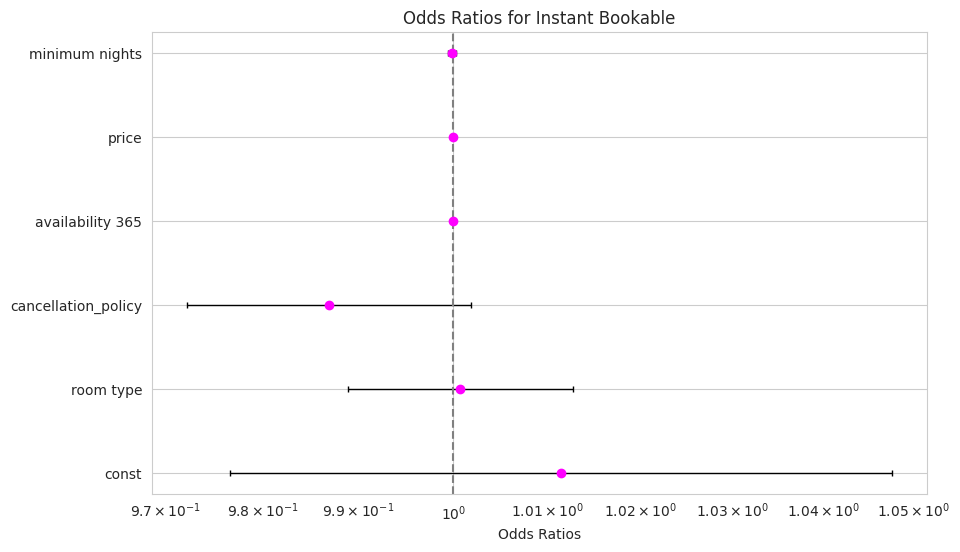

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Define the response variable
y = df['instant_bookable']

# Define the predictor variables
X = df[['room type', 'cancellation_policy','availability 365', 'price', 'minimum nights']]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Get the odds ratios and confidence intervals
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
conf = np.exp(conf)

# Plot the odds ratios with confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(conf['OR'], conf.index, xerr=[conf['OR'] - conf['2.5%'], conf['97.5%'] - conf['OR']], fmt='o', color='magenta', ecolor='black', elinewidth=1, capsize=2)
plt.axvline(x=1, linestyle='--', color='gray')
plt.xscale('log')
plt.xlabel('Odds Ratios')
plt.title('Odds Ratios for Instant Bookable')
plt.show()


**X-axis (Odds Ratios)**
   - The x-axis is on a logarithmic scale, representing the odds ratios (OR) for each predictor variable. An odds ratio of 1 (indicated by the vertical dashed line) means that the predictor does not affect the likelihood of the outcome. Values greater than 1 suggest an increase in the likelihood, while values less than 1 suggest a decrease.

**Y-axis (Predictor Variables)**
   - The y-axis lists the predictor variables included in the logistic regression model: `minimum nights`, `price`, `availability 365`, `cancellation_policy`, `room type`, and the constant term (`const`).

**Points and Error Bars**
   - Each magenta point represents the odds ratio for a predictor variable. The horizontal black error bars show the 95% confidence intervals for these odds ratios. If an error bar crosses the vertical dashed line at 1, the effect of the predictor is not statistically significant at the 5% level.

**Predictor Variables Interpretation**
   - **minimum nights**: The odds ratio is very close to 1, suggesting that the number of minimum nights required for booking does not significantly affect the likelihood of a listing being instant bookable.
   - **price**: The odds ratio is close to 1 with a narrow confidence interval, indicating that the price of the listing does not have a significant impact on whether it is instant bookable.
   - **availability 365**: Similar to `price`, the odds ratio is close to 1, suggesting that the number of available days in a year does not significantly influence the instant bookable status.
   - **cancellation_policy**: The confidence interval for this variable crosses 1, indicating that the effect of cancellation policy on the likelihood of being instant bookable is not statistically significant.
   - **room type**: The confidence interval also crosses 1, suggesting that the type of room (e.g., private room, entire home/apt, shared room, hotel room) does not have a statistically significant effect on whether the listing is instant bookable.

   - **const (Intercept)**: The intercept term has a wide confidence interval, indicating considerable uncertainty about the baseline odds of a listing being instant bookable when all predictors are at their reference levels.


### **Part D:**

Optimization terminated successfully.
         Current function value: 0.693105
         Iterations 4
                     Coefficient  Odds Ratio  CI Lower  CI Upper
const                   0.011414    1.011480  0.976658  1.047543
availability 365       -0.000070    0.999930  0.999838  1.000023
price                   0.000003    1.000003  0.999966  1.000040
minimum nights         -0.000152    0.999848  0.999432  1.000265
room type               0.000758    1.000758  0.988898  1.012761
cancellation_policy    -0.013136    0.986950  0.972204  1.001919


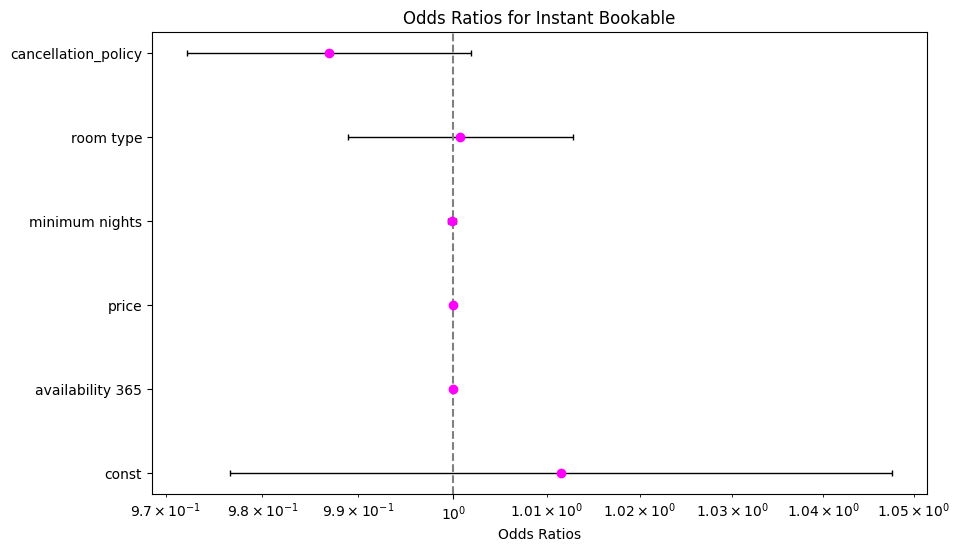

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Define the response variable
y = df['instant_bookable']

# Define the predictor variables
X = df[['availability 365', 'price', 'minimum nights', 'room type', 'cancellation_policy']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Extract coefficients and standard errors
coefficients = model.params
standard_errors = model.bse

# Calculate the 95% confidence intervals for the coefficients
conf = 1.96  # Z-score for 95% confidence
ci_lower = coefficients - conf * standard_errors
ci_upper = coefficients + conf * standard_errors

# Exponentiate to get the confidence intervals for the odds ratios
odds_ratios = np.exp(coefficients)
ci_lower_odds = np.exp(ci_lower)
ci_upper_odds = np.exp(ci_upper)

# Create a DataFrame for easy viewing
ci_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'CI Lower': ci_lower_odds,
    'CI Upper': ci_upper_odds
})

# Print the confidence intervals for the odds ratios
print(ci_df)

# Plot the odds ratios with confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(ci_df['Odds Ratio'], ci_df.index, xerr=[ci_df['Odds Ratio'] - ci_df['CI Lower'], ci_df['CI Upper'] - ci_df['Odds Ratio']], fmt='o', color='magenta', ecolor='black', elinewidth=1, capsize=2)
plt.axvline(x=1, linestyle='--', color='gray')
plt.xscale('log')
plt.xlabel('Odds Ratios')
plt.title('Odds Ratios for Instant Bookable')
plt.show()


- **Odds Ratios Near 1**: In this plot, most of the odds ratios are very close to 1, suggesting that the variables have little to no significant effect on whether a listing is instantly bookable.
- **Confidence Intervals**: If the confidence interval for an odds ratio crosses 1, it implies that the effect of the variable is not statistically significant at the chosen confidence level. In this plot, it appears that the confidence intervals for all variables cross 1, further indicating that none of these variables significantly affect the likelihood of a listing being instantly bookable.

## **Question 7:**

### **Part A:**

**Analysis of Significance:**

- **P>|z| values**: These p-values indicate whether the coefficients are significantly different from zero.
  - A p-value less than 0.05 typically indicates statistical significance.
  - All the p-values here are much greater than 0.05, suggesting that none of the variables are statistically significant in this model.

**Most Significant Variable:**

- While statistical significance is primarily indicated by p-values, the magnitude of the odds ratios can offer insights into the relative impact of variables.
- **instant_bookable** has an extremely large odds ratio $7.336946 \times 10^{26}$, indicating a very strong effect, though the variable is likely causing issues of perfect prediction (complete separation), as mentioned in the summary. This means that `instant_bookable` is effectively perfectly predicting the outcome, causing the Maximum Likelihood Estimator to fail to exist properly.


**Cancellation policy** shows the largest impact (odds ratio) among the meaningful variables without complete separation, but it's not statistically significant. However, in practical terms, it suggests a strong association when the model doesn't face perfect prediction issues. For statistically significant prediction, more refined data or a different modeling approach might be required.


### **Part B:**

Optimization terminated successfully.
         Current function value: 0.693105
         Iterations 4
                     Coefficient  Odds Ratio  CI Lower  CI Upper
const                   0.011414    1.011480  0.976658  1.047543
availability 365       -0.000070    0.999930  0.999838  1.000023
price                   0.000003    1.000003  0.999966  1.000040
minimum nights         -0.000152    0.999848  0.999432  1.000265
room type               0.000758    1.000758  0.988898  1.012761
cancellation_policy    -0.013136    0.986950  0.972204  1.001919


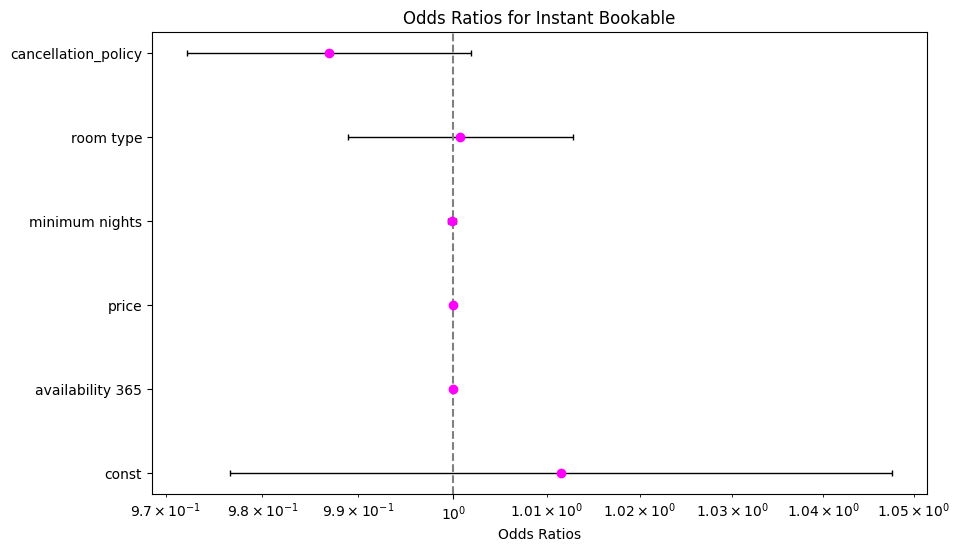

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Define the response variable
y = df['instant_bookable']

# Define the predictor variables
X = df[['availability 365', 'price', 'minimum nights', 'room type', 'cancellation_policy']]

# Create dummy variables for categorical variables 'room type' and 'cancellation_policy'
X = pd.get_dummies(X, drop_first=True)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Extract coefficients and standard errors
coefficients = model.params
standard_errors = model.bse

# Calculate the 95% confidence intervals for the coefficients
conf = 1.96  # Z-score for 95% confidence
ci_lower = coefficients - conf * standard_errors
ci_upper = coefficients + conf * standard_errors

# Exponentiate to get the confidence intervals for the odds ratios
odds_ratios = np.exp(coefficients)
ci_lower_odds = np.exp(ci_lower)
ci_upper_odds = np.exp(ci_upper)

# Create a DataFrame for easy viewing
ci_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'CI Lower': ci_lower_odds,
    'CI Upper': ci_upper_odds
})

# Print the confidence intervals for the odds ratios
print(ci_df)

# Plot the odds ratios with confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(ci_df['Odds Ratio'], ci_df.index, xerr=[ci_df['Odds Ratio'] - ci_df['CI Lower'], ci_df['CI Upper'] - ci_df['Odds Ratio']], fmt='o', color='magenta', ecolor='black', elinewidth=1, capsize=2)
plt.axvline(x=1, linestyle='--', color='gray')
plt.xscale('log')
plt.xlabel('Odds Ratios')
plt.title('Odds Ratios for Instant Bookable')
plt.yticks(ticks=range(len(ci_df.index)), labels=ci_df.index)
plt.show()

Most predictor variables (cancellation_policy, room type, price, and availability 365) have odds ratios near 1 and confidence intervals that often cross 1, indicating that they do not significantly affect the likelihood of a listing being instantly bookable. Only minimum nights and price show statistical significance, but their odds ratios are so close to 1 that their practical impact is minimal.

This analysis suggests that the variables included in the model do not provide strong predictors of instant bookability. 

### **Part C:**

In [ ]:
# Define additional explanatory variables
explanatory_vars = df[['availability 365', 'price', 'minimum nights', 'room type', 'cancellation_policy']]

# Add constant term for intercept
X = sm.add_constant(explanatory_vars)
y = df['instant_bookable']

# Fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Summary of the logistic regression model
summary = log_reg.summary()
print(summary)


Optimization terminated successfully.
         Current function value: 0.693105
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       instant_bookable   No. Observations:               102058
Model:                          Logit   Df Residuals:                   102052
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:               4.129e-05
Time:                        18:06:41   Log-Likelihood:                -70737.
converged:                       True   LL-Null:                       -70740.
Covariance Type:            nonrobust   LLR p-value:                    0.3219
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0114      0.018      0.639      0.523      -0.024       0.046
av

### **Part D:**

Optimization terminated successfully.
         Current function value: 0.693105
         Iterations 4


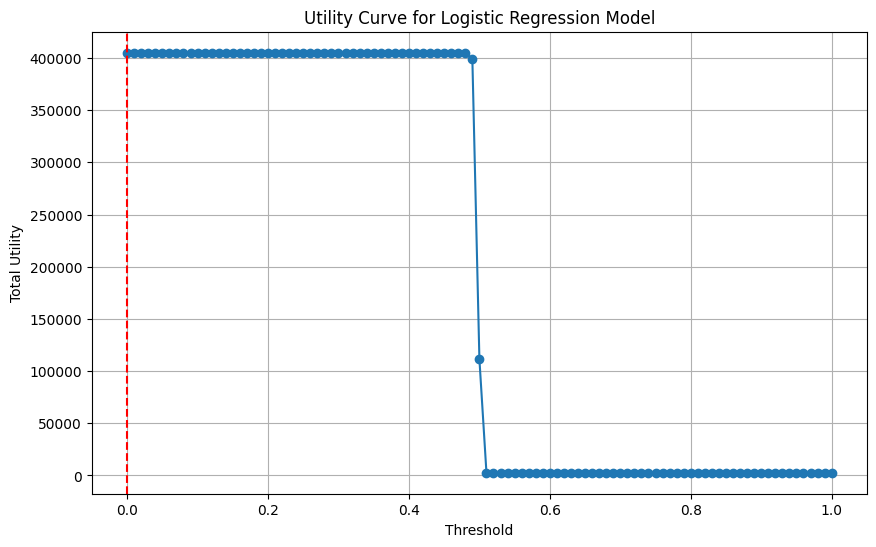

The best threshold is 0.0 with a total utility of 405088.


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Define the response variable and explanatory variables
response = df['instant_bookable']
explanatory_vars = df[['availability 365', 'price', 'minimum nights', 'room type', 'cancellation_policy']]

# Add a constant term for intercept
X = sm.add_constant(explanatory_vars)
y = response

# Fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Calculate predicted probabilities
df['pred_prob'] = log_reg.predict(X)

# Define utility values
U_TP = 10
U_TN = 5
U_FP = -2
U_FN = -5

# Function to calculate utility
def calculate_utility(threshold, data, U_TP, U_TN, U_FP, U_FN):
    data['predicted'] = (data['pred_prob'] >= threshold).astype(int)
    TP = ((data['predicted'] == 1) & (data['instant_bookable'] == 1)).sum()
    TN = ((data['predicted'] == 0) & (data['instant_bookable'] == 0)).sum()
    FP = ((data['predicted'] == 1) & (data['instant_bookable'] == 0)).sum()
    FN = ((data['predicted'] == 0) & (data['instant_bookable'] == 1)).sum()
    total_utility = (TP * U_TP) + (TN * U_TN) + (FP * U_FP) + (FN * U_FN)
    return total_utility

# Evaluate utility for different thresholds
thresholds = np.arange(0, 1.01, 0.01)
utilities = [calculate_utility(t, df, U_TP, U_TN, U_FP, U_FN) for t in thresholds]

# Find the best threshold
best_threshold = thresholds[np.argmax(utilities)]
best_utility = max(utilities)

# Plot the utility curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, utilities, marker='o', linestyle='-')
plt.axvline(x=best_threshold, color='red', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Total Utility')
plt.title('Utility Curve for Logistic Regression Model')
plt.grid(True)
plt.show()

print(f'The best threshold is {best_threshold} with a total utility of {best_utility}.')

The utility curve shows how the total utility, combining the benefits of true positives (TP) and true negatives (TN) against the costs of false positives (FP) and false negatives (FN), varies with different threshold values in a logistic regression model. The best threshold, indicated by the red dashed line, is close to 0, where the total utility is maximized, suggesting this threshold balances the trade-offs between TP, TN, FP, and FN effectively. 